In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("whitegrid")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en Solarize_Lihgt2. 
plt.style.use('Solarize_Light2')

from statsmodels.stats.proportion import proportions_ztest

## FASE 1: ANÁLISIS EXPLORATORIO DE DATOS (EDA)

In [3]:
df_raw= pd.read_csv("/Users/julia/Workspace/Adalab/MODULO 3 TRANSFORMACION DATOS/TEMARIO MÓDULO 3/PROYECTO/HR RAW DATA.csv")
df_raw.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


In [4]:
# Dataset HR_RAW_DATA
print(f"\nInformación del 1º dataset")
print("-----------------------------------")
print(df_raw.info())
print("-----------------------------------")
print(f"\nNombre de las columnas:")
print(df_raw.columns)
print("-----------------------------------")
print(f"\nEstructura datos:")
print(df_raw.shape)
print("------------------------------------")
print(f"\nParámetros estadísticos básicos:")
print(df_raw.describe().T)
print("-----------------------------------")
print(f"\nEl tipo de datos:")
print(df_raw.dtypes)


Información del 1º dataset
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1614 non-null   int64  
 1   Age                       1614 non-null   object 
 2   Attrition                 1614 non-null   object 
 3   BusinessTravel            842 non-null    object 
 4   DailyRate                 1614 non-null   object 
 5   Department                302 non-null    object 
 6   DistanceFromHome          1614 non-null   int64  
 7   Education                 1614 non-null   int64  
 8   EducationField            869 non-null    object 
 9   employeecount             1614 non-null   int64  
 10  employeenumber            1183 non-null   object 
 11  EnvironmentSatisfaction   1614 non-null   int64  
 12  Gender                    1614 non-null   int64  
 13 

In [5]:
# Homogeneizamos las columnas Renombramos las columnas.
renombradas_hr_raw_data= {columna:columna.lower().replace('','') for columna in df_raw.columns}
# Usamos un diccionario con los nombres de columnas modificados para renombrar las columnas del DataFrame
df_raw.rename(columns = renombradas_hr_raw_data, inplace = True)
# Comprobamos que el diccionario se haya creado correctamente.
renombradas_hr_raw_data

{'Unnamed: 0': 'unnamed: 0',
 'Age': 'age',
 'Attrition': 'attrition',
 'BusinessTravel': 'businesstravel',
 'DailyRate': 'dailyrate',
 'Department': 'department',
 'DistanceFromHome': 'distancefromhome',
 'Education': 'education',
 'EducationField': 'educationfield',
 'employeecount': 'employeecount',
 'employeenumber': 'employeenumber',
 'EnvironmentSatisfaction': 'environmentsatisfaction',
 'Gender': 'gender',
 'HourlyRate': 'hourlyrate',
 'JobInvolvement': 'jobinvolvement',
 'JobLevel': 'joblevel',
 'JobRole': 'jobrole',
 'JobSatisfaction': 'jobsatisfaction',
 'MaritalStatus': 'maritalstatus',
 'MonthlyIncome': 'monthlyincome',
 'MonthlyRate': 'monthlyrate',
 'NUMCOMPANIESWORKED': 'numcompaniesworked',
 'Over18': 'over18',
 'OverTime': 'overtime',
 'PercentSalaryHike': 'percentsalaryhike',
 'PerformanceRating': 'performancerating',
 'RelationshipSatisfaction': 'relationshipsatisfaction',
 'StandardHours': 'standardhours',
 'StockOptionLevel': 'stockoptionlevel',
 'TOTALWORKINGYEARS

In [6]:
def renombrar_columnas(df_raw):
    # Mostramos los nombres de las columnas
    print(df_raw.columns)
    # Renombramos a minúsculas
    df_raw.columns = df_raw.columns.str.lower()
    # Reemplazamos espacios y caracteres especiales por guiones bajos
    df_raw.rename(columns=lambda x: x.replace(' ', '_')
                          .replace('-', '_')
                          .replace('dailyrate', 'daily_rate')
                          .replace('distancefromhome', 'distance_from_home')
                          .replace('educationfield', 'education_field')
                          .replace('employeecount', 'employee_count')
                          .replace('employeenumber', 'employee_number')
                          .replace('environmentsatisfaction', 'environment_satisfaction')
                          .replace('hourlyrate', 'hourly_rate')
                          .replace('jobinvolvement', 'job_involvement')
                          .replace('joblevel', 'job_level')
                          .replace('jobsatisfaction', 'job_satisfaction')
                          .replace('monthlyincome', 'monthly_income')
                          .replace('monthlyrate', 'monthly_rate')
                          .replace('numcompaniesworked', 'num_companies_worked')
                          .replace('percentsalaryhike', 'percent_salary_hike')
                          .replace('performancerating', 'performance_rating')
                          .replace('relationshipsatisfaction', 'relationship_satisfaction')
                          .replace('standardhours', 'standard_hours')
                          .replace('stockoptionlevel', 'stock_option_level')
                          .replace('totalworkingyears', 'total_working_years')
                          .replace('trainingtimeslastyear', 'training_times_last_year')
                          .replace('worklifebalance', 'work_life_balance')
                          .replace('yearsatcompany', 'years_at_company')
                          .replace('yearsincurrentrole', 'years_in_current_role')
                          .replace('yearssincelastpromotion', 'years_since_last_promotion')
                          .replace('yearswithcurrmanager', 'years_with_curr_manager')
                          .replace('sameasmonthlyincome', 'same_as_monthly_income')
                          .replace('datebirth', 'date_birth')
                          .replace('roledepartament', 'role_departament')
                          .replace('numberchildren', 'number_children')
                          .replace('remotework', 'remote_work'), inplace=True)
    # Mostramos los nombres de las columnas
    print(df_raw.columns)
    return df_raw
# Llamamos a la función
df_renombradas= renombrar_columnas(df_raw)
df_renombradas.columns

Index(['unnamed: 0', 'age', 'attrition', 'businesstravel', 'dailyrate',
       'department', 'distancefromhome', 'education', 'educationfield',
       'employeecount', 'employeenumber', 'environmentsatisfaction', 'gender',
       'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate',
       'numcompaniesworked', 'over18', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'standardhours',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager',
       'sameasmonthlyincome', 'datebirth', 'salary', 'roledepartament',
       'numberchildren', 'remotework'],
      dtype='object')
Index(['unnamed:_0', 'age', 'attrition', 'businesstravel', 'daily_rate',
       'department', 'distance_from_home', 'education', 'education_field',
       'employee

Index(['unnamed:_0', 'age', 'attrition', 'businesstravel', 'daily_rate',
       'department', 'distance_from_home', 'education', 'education_field',
       'employee_count', 'employee_number', 'environment_satisfaction',
       'gender', 'hourly_rate', 'job_involvement', 'job_level', 'jobrole',
       'job_satisfaction', 'maritalstatus', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over18', 'overtime', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager',
       'sameasmonthly_income', 'date_birth', 'salary', 'role_departament',
       'number_children', 'remote_work'],
      dtype='object')

In [7]:
df_raw.to_csv("1_df_columnas_renombradas.csv", index=False)

In [8]:
# Quitamos el simbolo del dolar.
df_raw['daily_rate'] = df_raw['daily_rate'].str.replace('$', '', regex=False).astype(object)
print(f"\nEl resultado de la columna daily_rate sin simbolo dolar:")
df_raw['daily_rate']


El resultado de la columna daily_rate sin simbolo dolar:


0        684,0
1        699,0
2        532,0
3        359,0
4       1319,0
         ...  
1609     530,0
1610     805,0
1611     903,0
1612    1229,0
1613     566,0
Name: daily_rate, Length: 1614, dtype: object

In [9]:
# Convertir todas las filas de la columna "JobRole" a minúsculas
df_raw['jobrole'] = df_raw['jobrole'].str.lower()
print(df_raw)

      unnamed:_0 age attrition businesstravel daily_rate  \
0              0  51        No            NaN      684,0   
1              1  52        No            NaN      699,0   
2              2  42        No  travel_rarely      532,0   
3              3  47        No  travel_rarely      359,0   
4              4  46        No            NaN     1319,0   
...          ...  ..       ...            ...        ...   
1609        1609  36       Yes  travel_rarely      530,0   
1610        1610  45        No     non-travel      805,0   
1611        1611  39        No  travel_rarely      903,0   
1612        1612  36        No     non-travel     1229,0   
1613        1613  46        No            NaN      566,0   

                    department  distance_from_home  education  \
0                          NaN                   6          3   
1                          NaN                   1          4   
2      Research & Development                    4          2   
3                  

In [10]:
df_raw.head()

,unnamed:_0,age,attrition,businesstravel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,jobrole,job_satisfaction,maritalstatus,monthly_income,monthly_rate,num_companies_worked,over18,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,sameasmonthly_income,date_birth,salary,role_departament,number_children,remote_work
0,0,51,No,NaN,"684,0",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,research director,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,"699,0",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,manager,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,"532,0",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,manager,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,"359,0",NaN,2,4,Medical,1,NaN,1,1,82,3,4,research director,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,"1319,0",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sales executive,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


## FASE 2: TRANSFORMACIÓN DE DATOS

In [11]:
def reemplazar_valores(df_raw):
    # Reemplazamos los valores de la columna Gender (0 y 1 por 'Female' y 'Male')
    if 'gender' in df_raw.columns:
        df_raw['gender'] = df_raw['gender'].replace({0: 'Female', 1: 'Male'})
    
    # Reemplazar las comas por puntos en la columna 'daily_rate', si es necesario
    if 'daily_rate' in df_raw.columns:
        df_raw['daily_rate'] = df_raw['daily_rate'].apply(lambda x: str(x).replace(",", ".") if isinstance(x, str) else x)
        df_raw['daily_rate'] = pd.to_numeric(df_raw['daily_rate'], errors='coerce')  # Convertir a numérico
        df_raw['total_working_years'] = df_raw['total_working_years'].apply(lambda x: str(x).replace(",", ".") if isinstance(x, str) else x)
        df_raw['total_working_years'] = pd.to_numeric(df_raw['total_working_years'], errors='coerce')  # Convertir a numérico
    
    # Evaluar si hay valores duplicados
    duplicados = df_raw.duplicated().sum()
    print(f"\nHay {duplicados} registros duplicados")
    
    # Reemplazar valores negativos en la columna DistanceFromHome por la media
    if 'distance_from_home' in df_raw.columns:
        df_raw['distance_from_home'] = df_raw['distance_from_home'].apply(lambda x: df_raw['distance_from_home'].mean() if x < 0 else x)
    
    # Reemplazar valores faltantes en la columna 'age' por la media
    if 'age' in df_raw.columns:
        df_raw['age'] = pd.to_numeric(df_raw['age'], errors='coerce')  # Convertir a numérico
        df_raw['age'] = df_raw['age'].fillna(df_raw['age'].mean())  # Rellenar con la media
    
    # Reemplazar errores tipográficos en la columna 'marital_status'
    if 'marital_status' in df_raw.columns:
        df_raw['marital_status'] = df_raw['marital_status'].replace({'Marreid': 'Married'})
    
    # Eliminar columnas redundantes
    redundant_columns = ['employee_count', 'standard_hours', 'employee_number']
    df_raw = df_raw.drop(columns=[col for col in redundant_columns if col in df_raw.columns])
    
    # Eliminar columnas con valores constantes
    constant_columns = ['over18', 'sameasmonthly_income']
    df_raw = df_raw.drop(columns=[col for col in constant_columns if col in df_raw.columns])
    
    return df_raw

# Llamamos a la función
df= reemplazar_valores(df_raw)

# Mostramos los primeros registros para verificar los cambios
print(df)



Hay 0 registros duplicados
      unnamed:_0   age attrition businesstravel  daily_rate  \
0              0  51.0        No            NaN       684.0   
1              1  52.0        No            NaN       699.0   
2              2  42.0        No  travel_rarely       532.0   
3              3  47.0        No  travel_rarely       359.0   
4              4  46.0        No            NaN      1319.0   
...          ...   ...       ...            ...         ...   
1609        1609  36.0       Yes  travel_rarely       530.0   
1610        1610  45.0        No     non-travel       805.0   
1611        1611  39.0        No  travel_rarely       903.0   
1612        1612  36.0        No     non-travel      1229.0   
1613        1613  46.0        No            NaN       566.0   

                    department  distance_from_home  education  \
0                          NaN            6.000000          3   
1                          NaN            1.000000          4   
2      Research & De

In [12]:
df.to_csv("2_df_transformacion_datos.csv", index=False)

In [13]:
df.head()

,unnamed:_0,age,attrition,businesstravel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,jobrole,job_satisfaction,maritalstatus,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,date_birth,salary,role_departament,number_children,remote_work
0,0,51.0,No,NaN,684.0,NaN,6.0,3,NaN,1,Female,51,3,5,research director,3,NaN,"19537,0",6462,7,No,13,"3,0",3,0,NaN,5,"3,0",20,NaN,15,15,1972,1000000000$,NaN,NaN,Yes
1,1,52.0,No,NaN,699.0,NaN,1.0,4,Life Sciences,3,Female,65,2,5,manager,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,1,34.0,5,"3,0",33,NaN,11,9,1971,1000000000$,NaN,NaN,1
2,2,42.0,No,travel_rarely,532.0,Research & Development,4.0,2,Technical Degree,3,Female,58,3,5,manager,4,Married,"19232,0",4933,1,No,11,"3,0",4,0,22.0,3,NaN,22,NaN,11,15,1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47.0,No,travel_rarely,359.0,NaN,2.0,4,Medical,1,Male,82,3,4,research director,3,Married,"17169,0",26703,3,NaN,19,"3,0",2,2,NaN,2,NaN,20,NaN,5,6,1976,1000000000$,NaN,NaN,False
4,4,46.0,No,NaN,1319.0,NaN,3.0,3,Technical Degree,1,Male,45,4,4,sales executive,1,Divorced,NaN,7739,2,No,12,"3,0",4,1,NaN,5,"3,0",19,NaN,2,8,1977,1000000000$,NaN,NaN,0


In [14]:
# Identificacion y selecccion de variables con nulos.
def identificar_tratamiento_nulos(df):
    # Calcular el porcentaje de valores nulos.
    nulos = df.isnull().sum() / df.shape[0] * 100
    # Mostrar solo valores nulos
    nulos = nulos[nulos > 0]
    # Ordenar los valores nulos de mayor a menor y redondear a 2 decimales.
    nulos = nulos.sort_values(ascending=False).round(2)
    print(f"\nEl porcentaje de mis variables con nulos es (antes de eliminar columnas):")
    print(nulos)
    # Eliminar las columnas con más del 70% de valores nulos.
    umbral = 70
    columnas_nulas = nulos[nulos > umbral].index
    df = df.drop(columns=columnas_nulas)
    print(f"\nSe han eliminado las columnas con más del {umbral}% de valores nulos")
    # Calcular el porcentaje de valores nulos después de eliminar columnas.
    nulos_despues = df.isnull().sum() / df.shape[0] * 100
    nulos_despues = nulos_despues[nulos_despues > 0]
    nulos_despues = nulos_despues.sort_values(ascending=False).round(2)
    print(f"\nEl porcentaje de mis variables con nulos es (después de eliminar columnas):")
    print(nulos_despues)
    return df
# Llamamos a la función
df = identificar_tratamiento_nulos(df)
# Mostramos los primeros registros para verificar los cambios efectuados.
print(df.head())


El porcentaje de mis variables con nulos es (antes de eliminar columnas):
number_children          100.00
years_in_current_role     97.89
department                81.29
role_departament          81.29
monthly_income            52.23
businesstravel            47.83
education_field           46.16
overtime                  41.88
maritalstatus             40.33
total_working_years       32.59
performance_rating        12.08
daily_rate                 7.68
work_life_balance          6.69
dtype: float64

Se han eliminado las columnas con más del 70% de valores nulos

El porcentaje de mis variables con nulos es (después de eliminar columnas):
monthly_income         52.23
businesstravel         47.83
education_field        46.16
overtime               41.88
maritalstatus          40.33
total_working_years    32.59
performance_rating     12.08
daily_rate              7.68
work_life_balance       6.69
dtype: float64
   unnamed:_0   age attrition businesstravel  daily_rate  distance_from_home 

In [15]:
df_raw.dtypes

unnamed:_0                      int64
age                           float64
attrition                      object
businesstravel                 object
daily_rate                    float64
department                     object
distance_from_home            float64
education                       int64
education_field                object
employee_count                  int64
employee_number                object
environment_satisfaction        int64
gender                         object
hourly_rate                    object
job_involvement                 int64
job_level                       int64
jobrole                        object
job_satisfaction                int64
maritalstatus                  object
monthly_income                 object
monthly_rate                    int64
num_companies_worked            int64
over18                         object
overtime                       object
percent_salary_hike             int64
performance_rating             object
relationship

In [16]:
df.to_csv("3_df_identificar_tratamiento_nulos.csv", index=False)

In [17]:
# Identificar variables categóricas y numéricas
def categoricas_y_numericas (df):
    # Identificar variables categóricas
    categoricas = df.select_dtypes(include=['object']).columns
    print(f"\nVariables categóricas: {categoricas}")
    # Identificar variables numéricas
    numericas = df.select_dtypes(include=['float64', 'int64']).columns
    print(f"\nVariables numéricas: {numericas}")
    return categoricas, numericas
# Llamamos a la función
categoricas, numericas = categoricas_y_numericas(df)


Variables categóricas: Index(['attrition', 'businesstravel', 'education_field', 'gender',
       'hourly_rate', 'jobrole', 'maritalstatus', 'monthly_income', 'overtime',
       'performance_rating', 'work_life_balance', 'salary', 'remote_work'],
      dtype='object')

Variables numéricas: Index(['unnamed:_0', 'age', 'daily_rate', 'distance_from_home', 'education',
       'environment_satisfaction', 'job_involvement', 'job_level',
       'job_satisfaction', 'monthly_rate', 'num_companies_worked',
       'percent_salary_hike', 'relationship_satisfaction',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'date_birth'],
      dtype='object')


In [18]:
#Estrategia:
    # Con más de un 40% de nulos.
    ## monthly_income (categorico)       businesstravel()      education_field       overtime            maritalstatus  
    # Con un % bajo nulos.
    ## total_working_years    performance_rating     daily_rate    work_life_balance    

In [19]:
# Imputamos según el porcentaje y el tipo de variable.
def imputar_valores_nulos(df):
    # Imputar valores nulos en variables numéricas
    for col in numericas:
        df[col] = df[col].fillna(df[col].mean())
    # Imputar valores nulos en variables categóricas
    for col in categoricas:
        df[col] = df[col].fillna(df[col].mode()[0])
    # Verificar si hay valores nulos
    nulos_despues = df.isnull().sum().sum()
    print(f"\nTotal de valores nulos después de la imputación: {nulos_despues}")
    return df
# Llamamos a la función
df = imputar_valores_nulos(df)


Total de valores nulos después de la imputación: 0


In [20]:
def calcular_estadistica_descriptiva(df):
    # Inicializar diccionarios para almacenar estadísticas
    estadisticas = {
        "numericas": {},
        "categoricas": {}
    }
    # Variables numéricas
    variables_numericas = df.select_dtypes(include=['float64', 'int64'])
    for col in variables_numericas.columns:
        estadisticas["numericas"][col] = {
            "mean": variables_numericas[col].mean(),
            "std": variables_numericas[col].std(),
            "min": variables_numericas[col].min(),
            "25%": variables_numericas[col].quantile(0.25),
            "50%": variables_numericas[col].median(),
            "75%": variables_numericas[col].quantile(0.75),
            "max": variables_numericas[col].max(),
            "missing_values": variables_numericas[col].isnull().sum()
        }
    
    # Variables categóricas
    variables_categoricas = df.select_dtypes(include=['object', 'category'])
    for col in variables_categoricas.columns:
        estadisticas["categoricas"][col] = variables_categoricas[col].value_counts().to_dict()
        estadisticas["categoricas"][col]["missing_values"] = variables_categoricas[col].isnull().sum()
    return estadisticas

# Llamamos a la función y almacenamos las estadísticas en una variable aparte
estadisticas = calcular_estadistica_descriptiva(df)

# Mostramos las estadísticas generadas
print(f"\nEstadísticas numéricas:")
print(estadisticas["numericas"])
print("\nEstadísticas categóricas:")
print(estadisticas["categoricas"])


Estadísticas numéricas:
{'unnamed:_0': {'mean': 806.5, 'std': 466.06598245312864, 'min': 0, '25%': 403.25, '50%': 806.5, '75%': 1209.75, 'max': 1613, 'missing_values': 0}, 'age': {'mean': 36.91011235955056, 'std': 9.05028509892581, 'min': 18.0, '25%': 30.0, '50%': 36.0, '75%': 43.0, 'max': 60.0, 'missing_values': 0}, 'daily_rate': {'mean': 802.0852348993288, 'std': 387.43714981387745, 'min': 103.0, '25%': 498.0, '50%': 802.0852348993288, '75%': 1130.75, 'max': 1499.0, 'missing_values': 0}, 'distance_from_home': {'mean': 8.373131475057928, 'std': 7.567173484123035, 'min': 1.0, '25%': 2.0, '50%': 5.0, '75%': 11.0, 'max': 29.0, 'missing_values': 0}, 'education': {'mean': 2.9250309789343247, 'std': 1.0223566458203242, 'min': 1, '25%': 2.0, '50%': 3.0, '75%': 4.0, 'max': 5, 'missing_values': 0}, 'environment_satisfaction': {'mean': 4.294919454770756, 'std': 6.993559092363572, 'min': 1, '25%': 2.0, '50%': 3.0, '75%': 4.0, 'max': 49, 'missing_values': 0}, 'job_involvement': {'mean': 2.739776

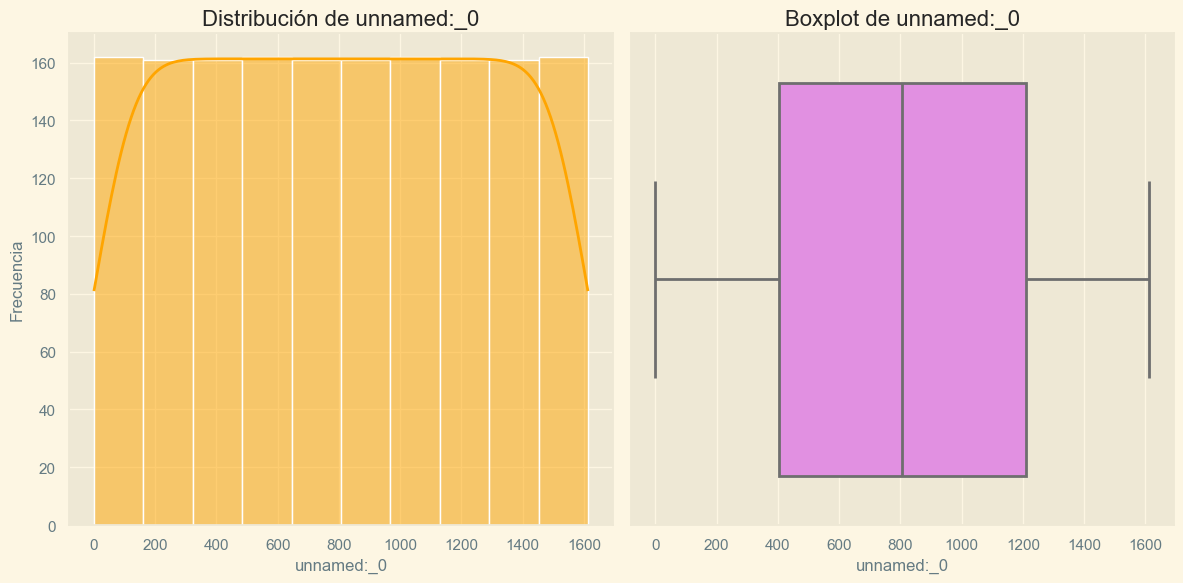

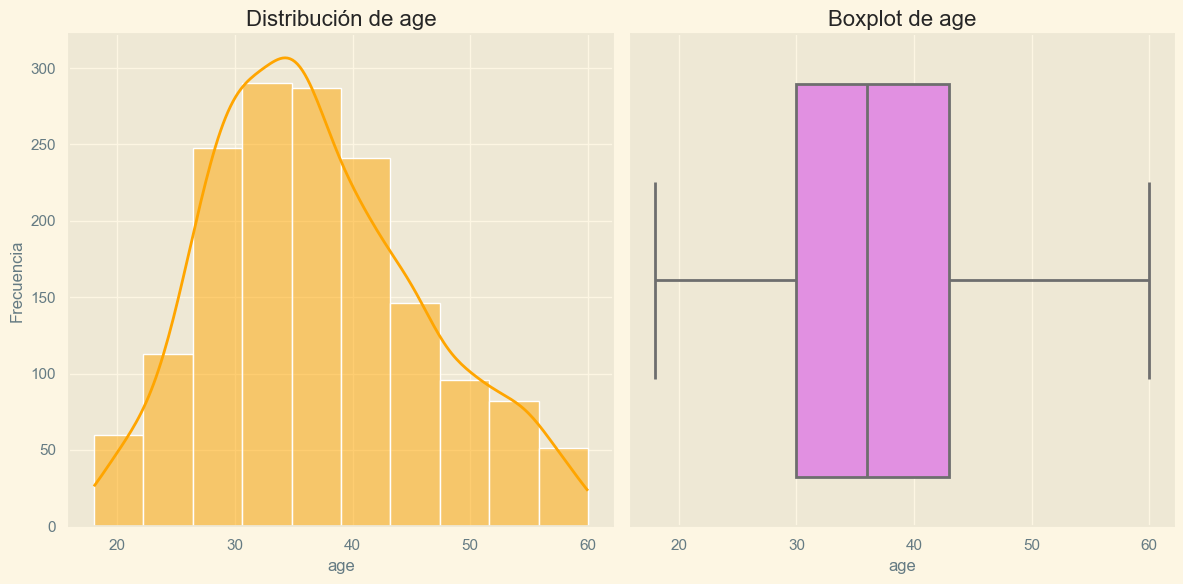

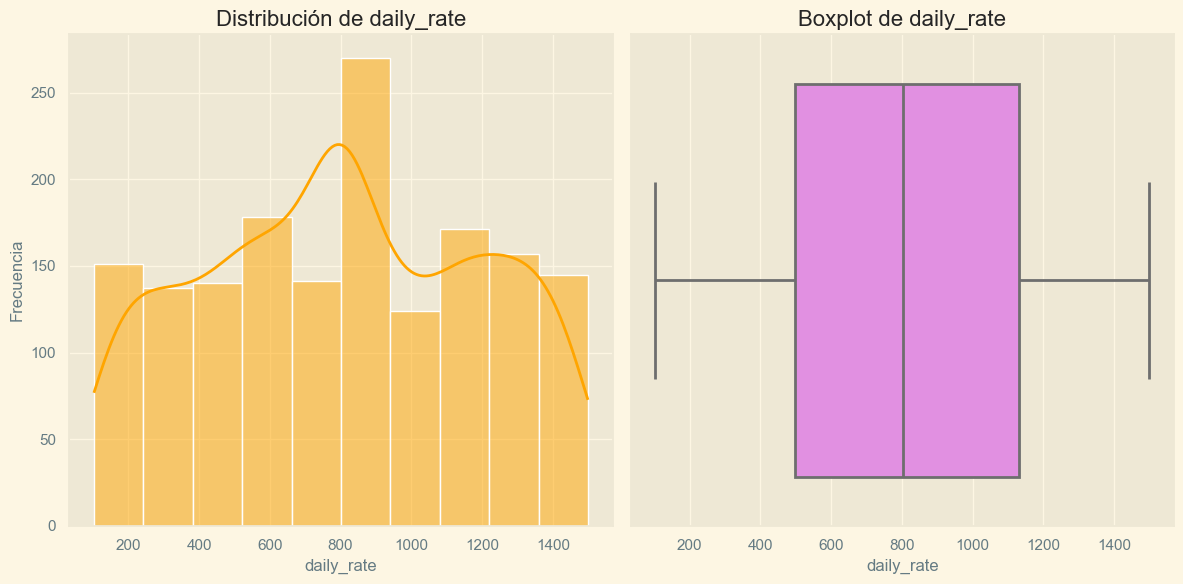

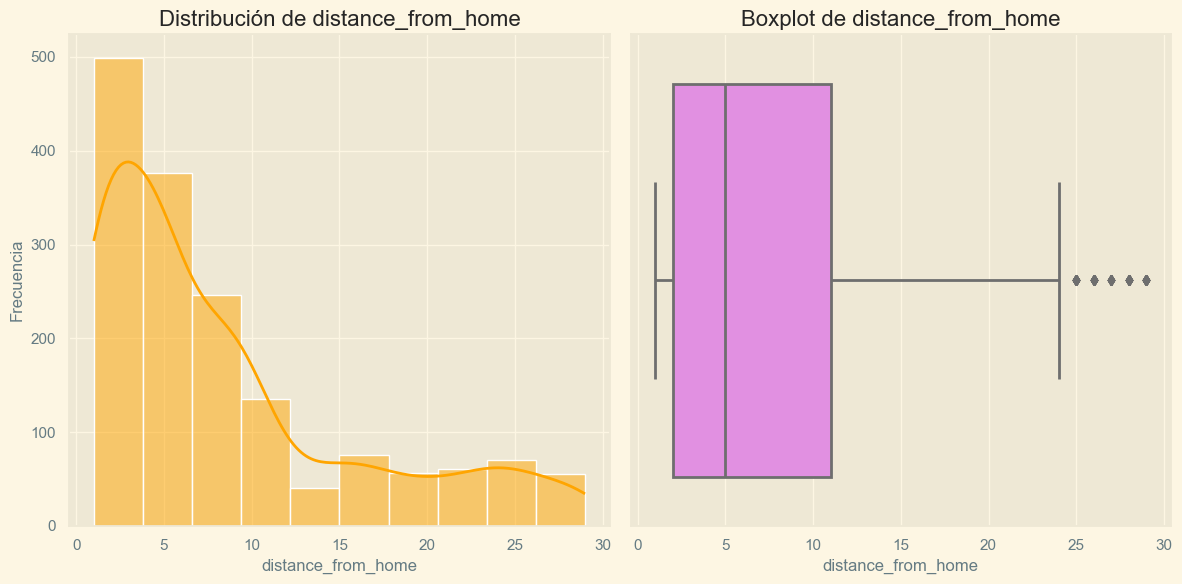

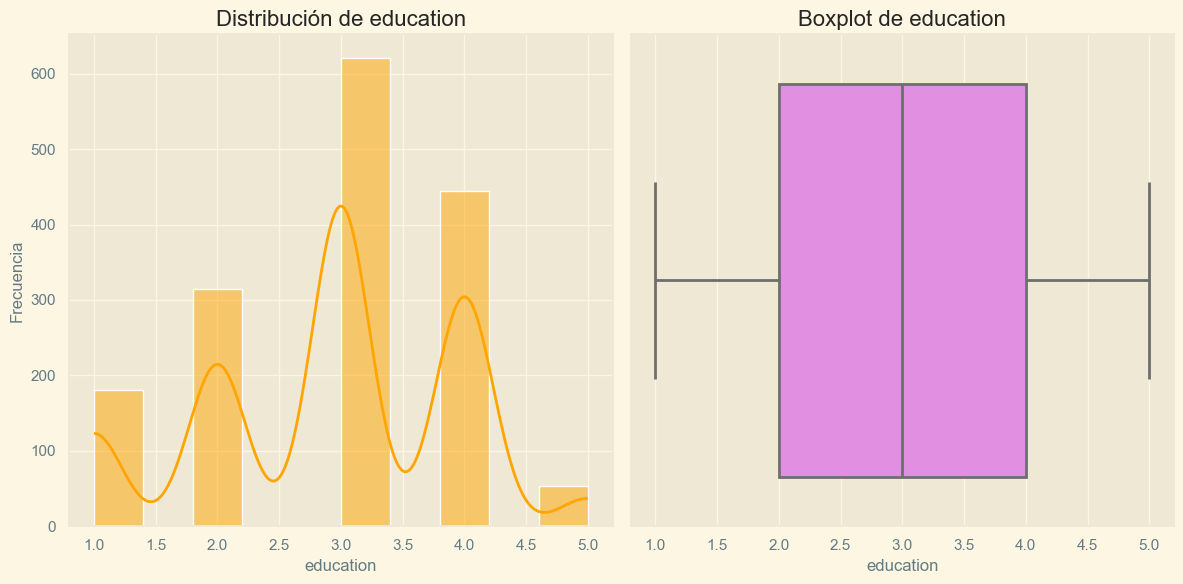

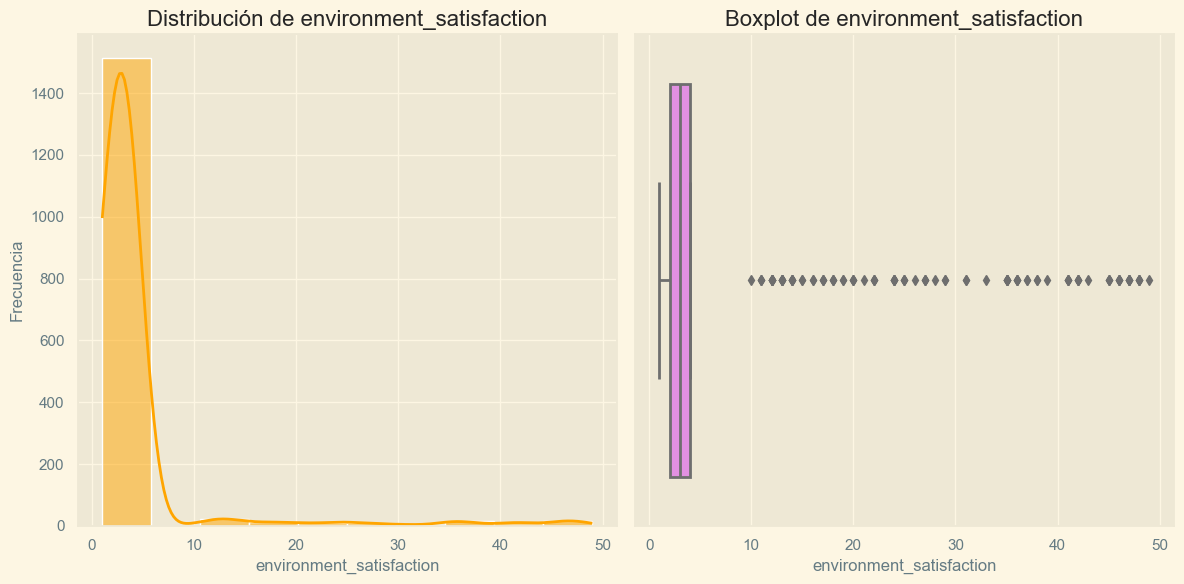

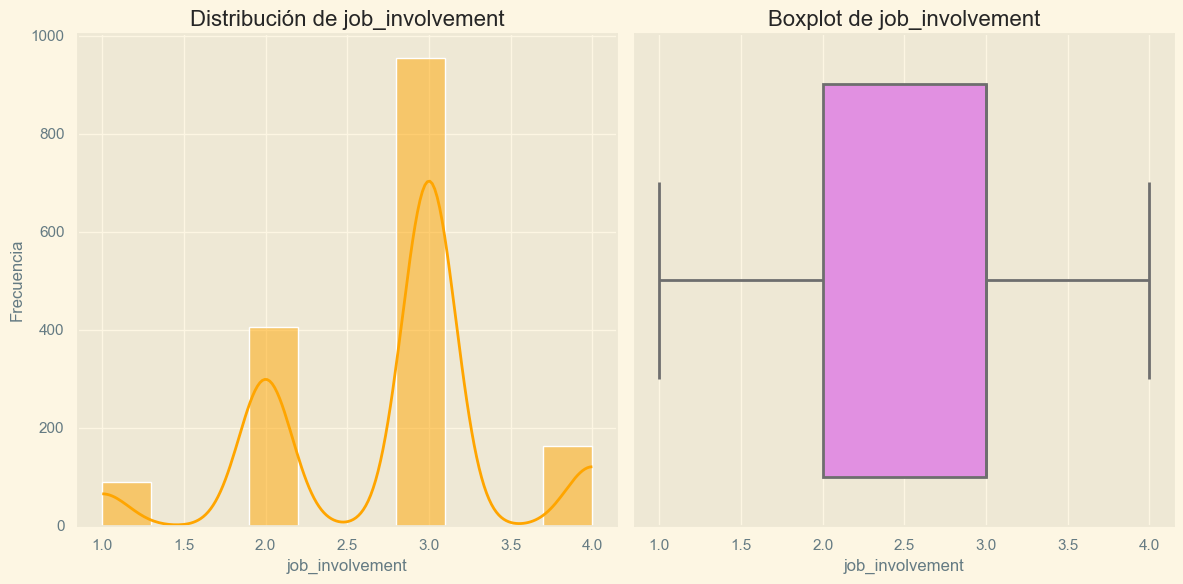

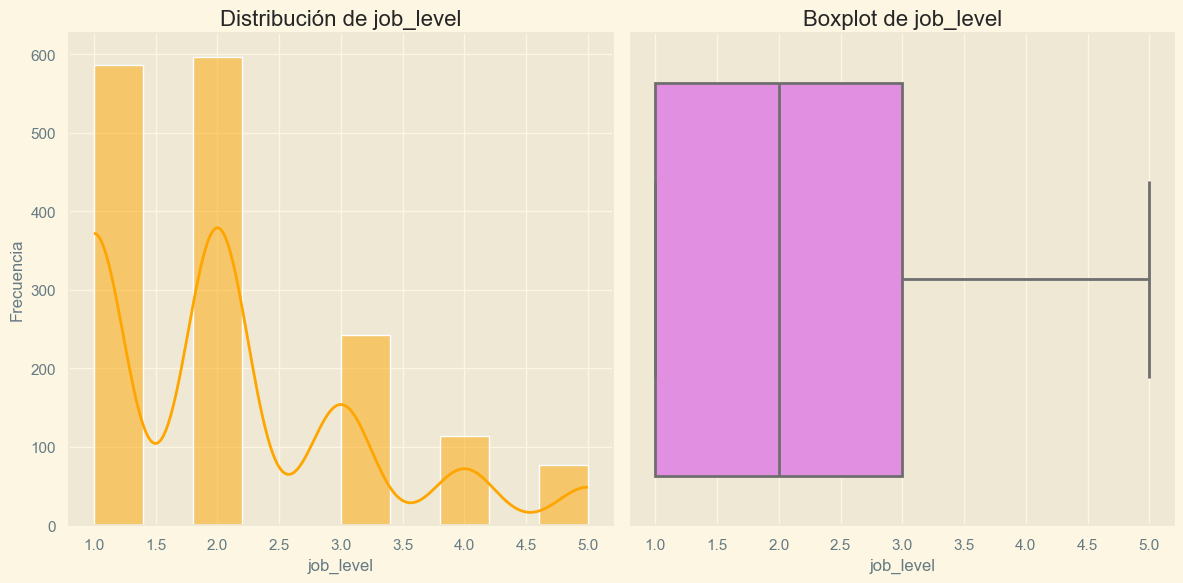

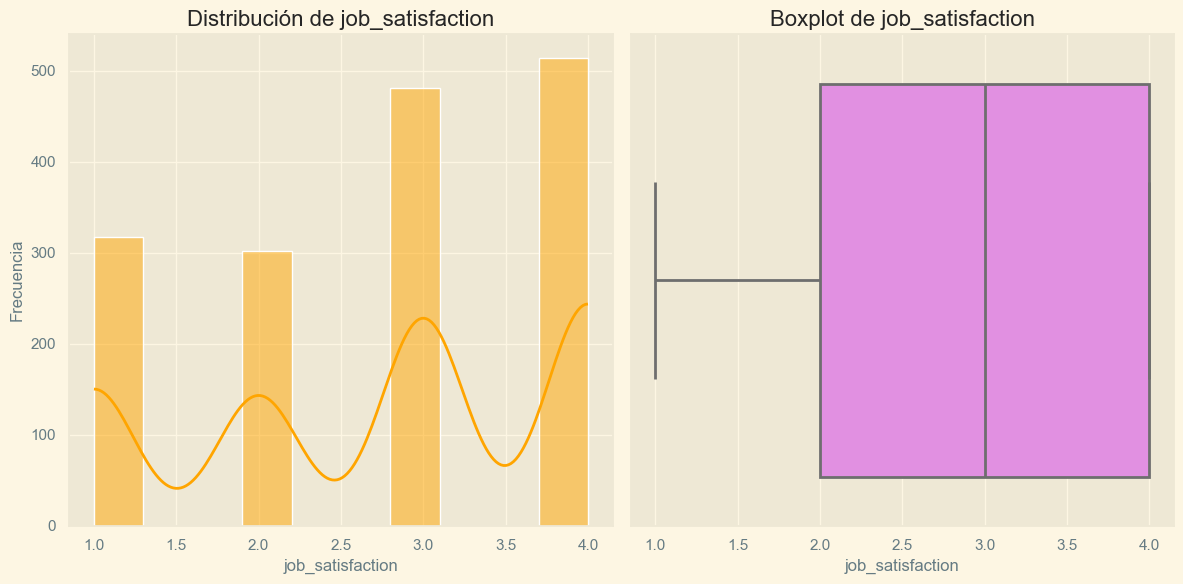

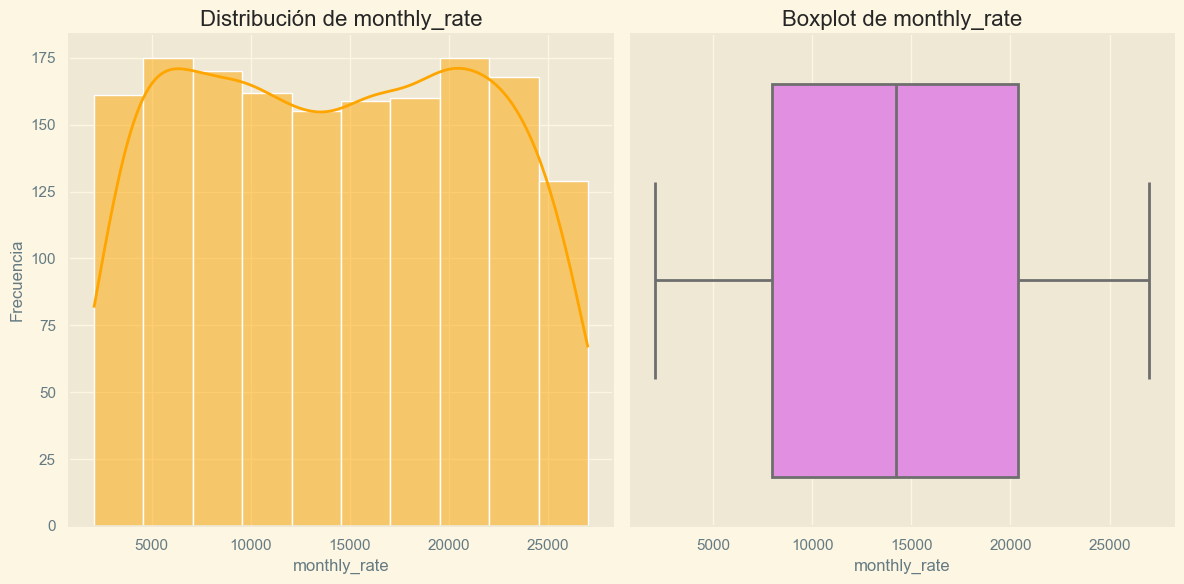

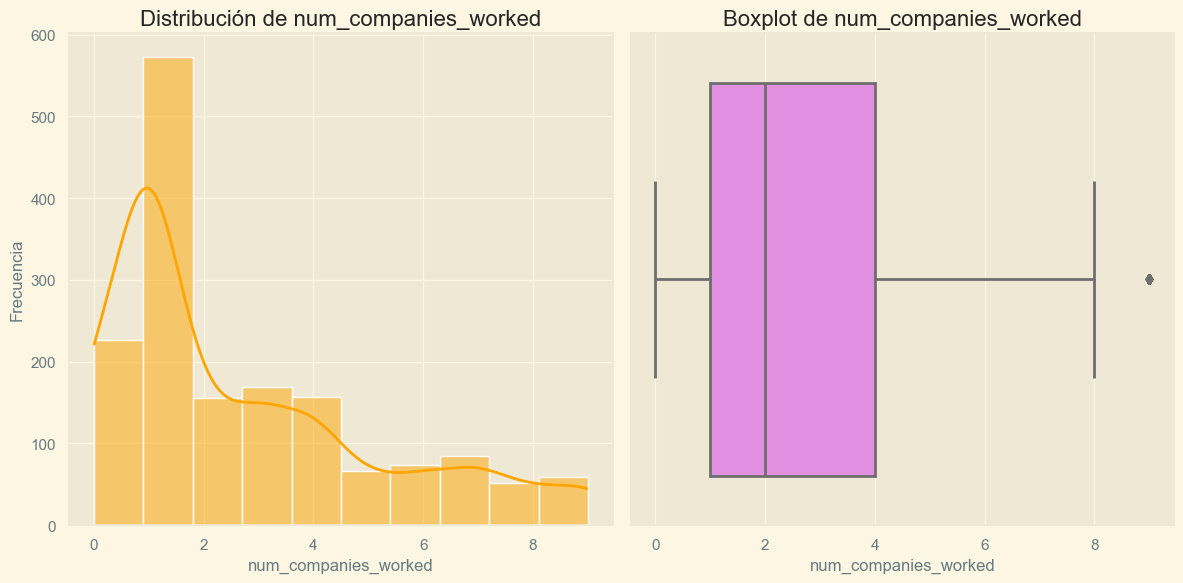

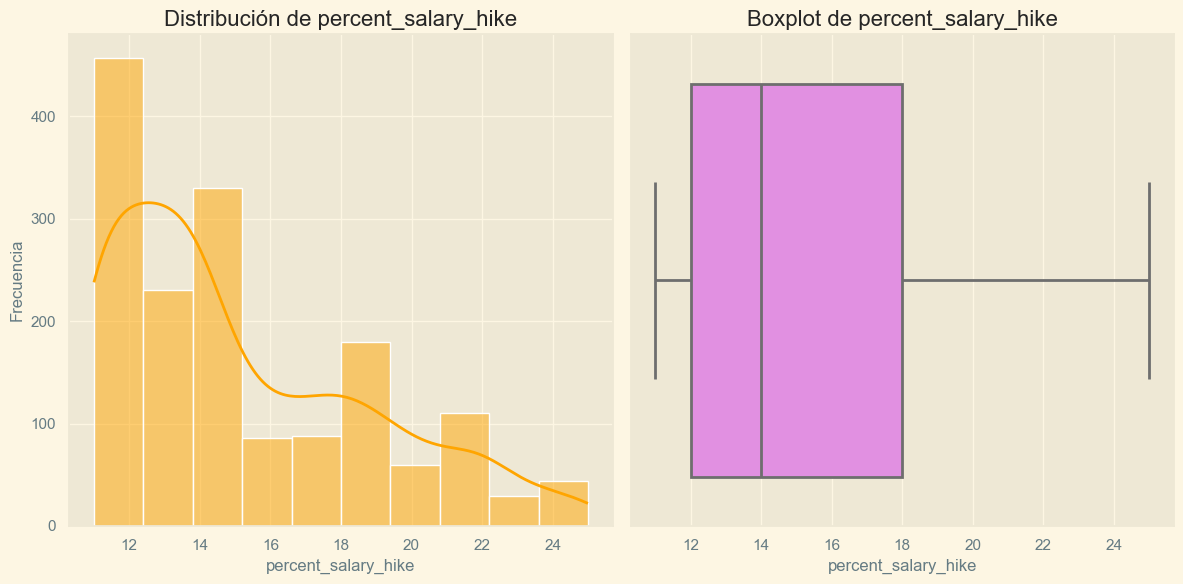

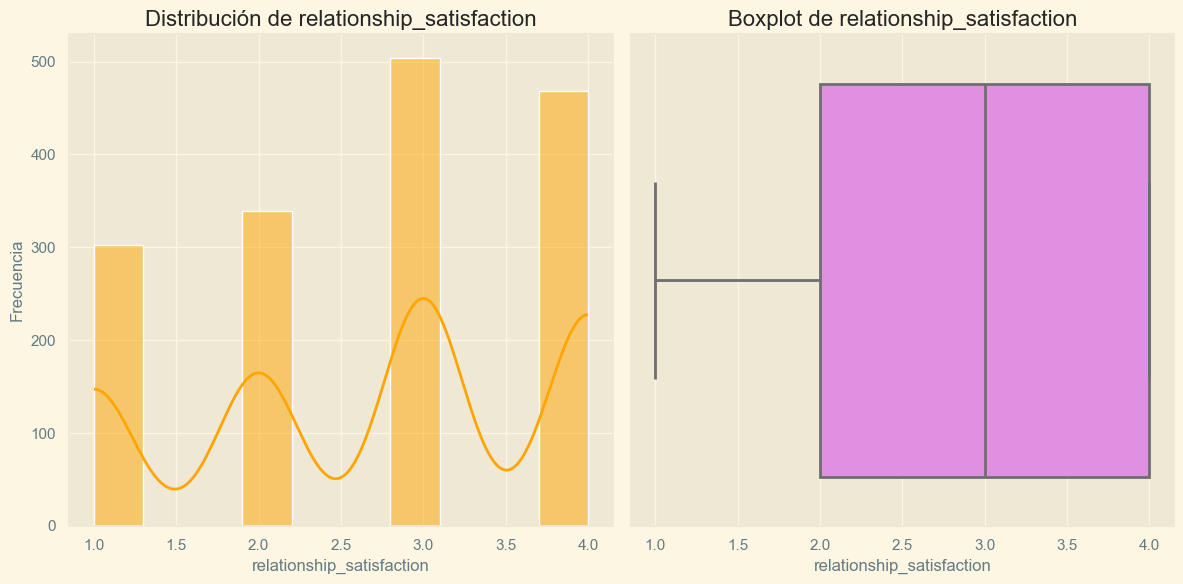

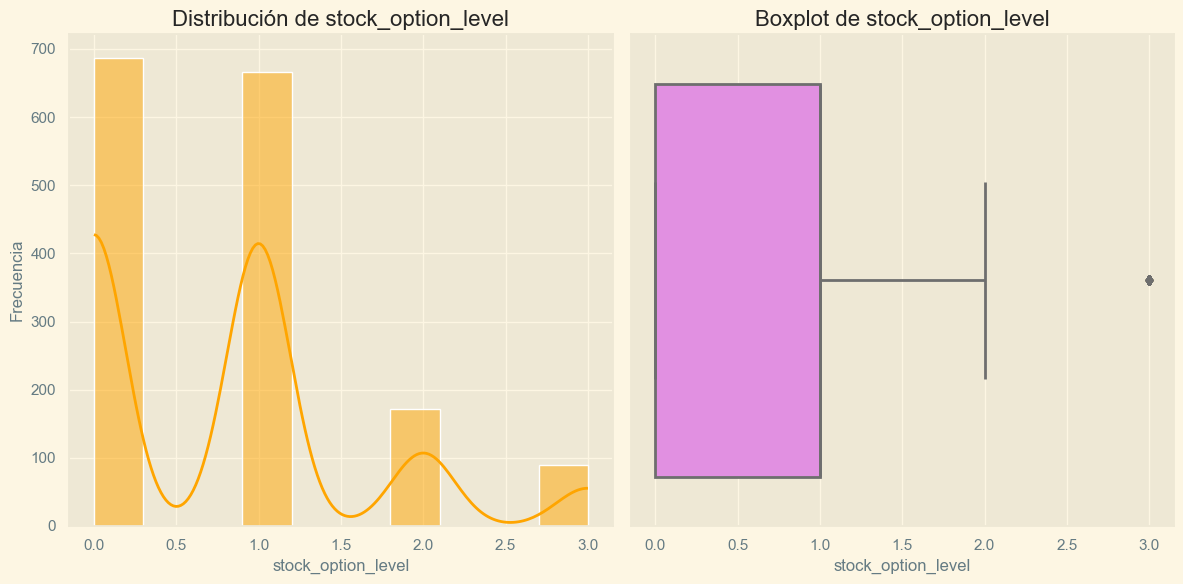

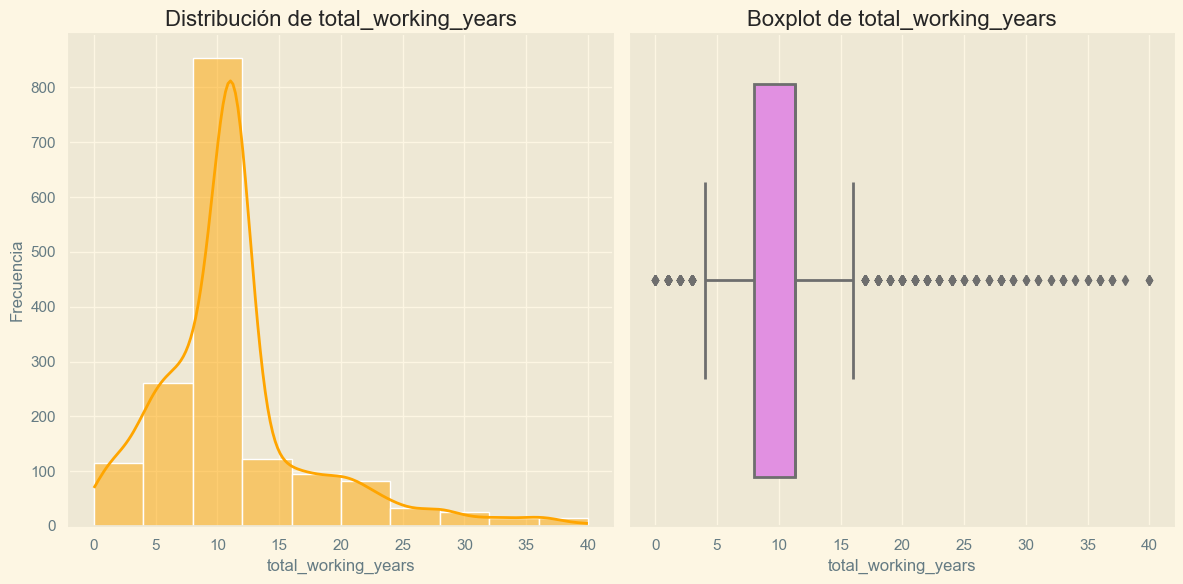

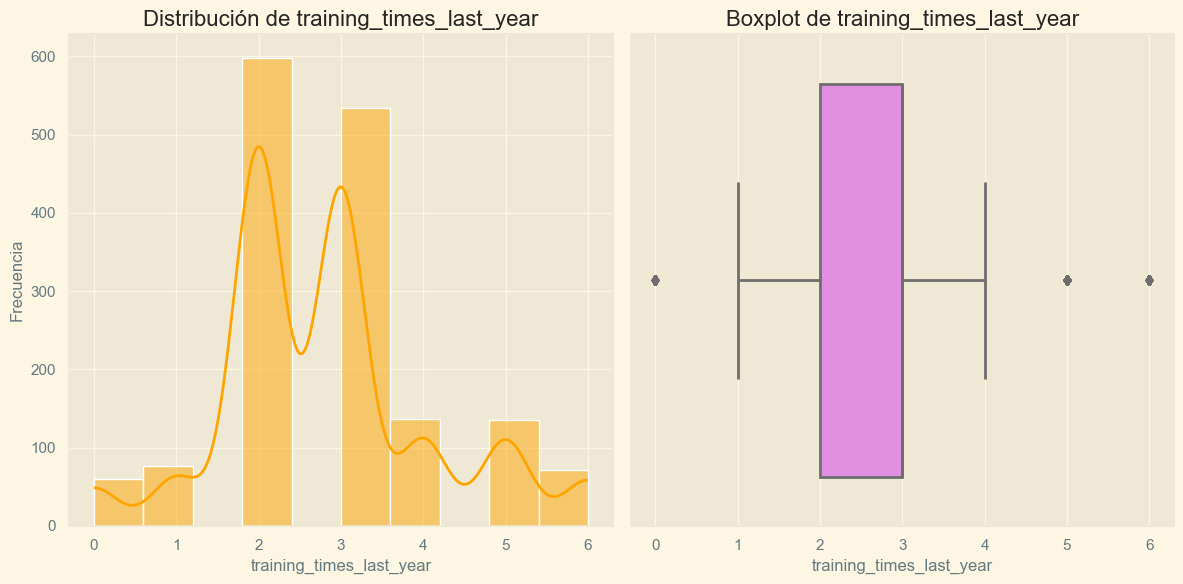

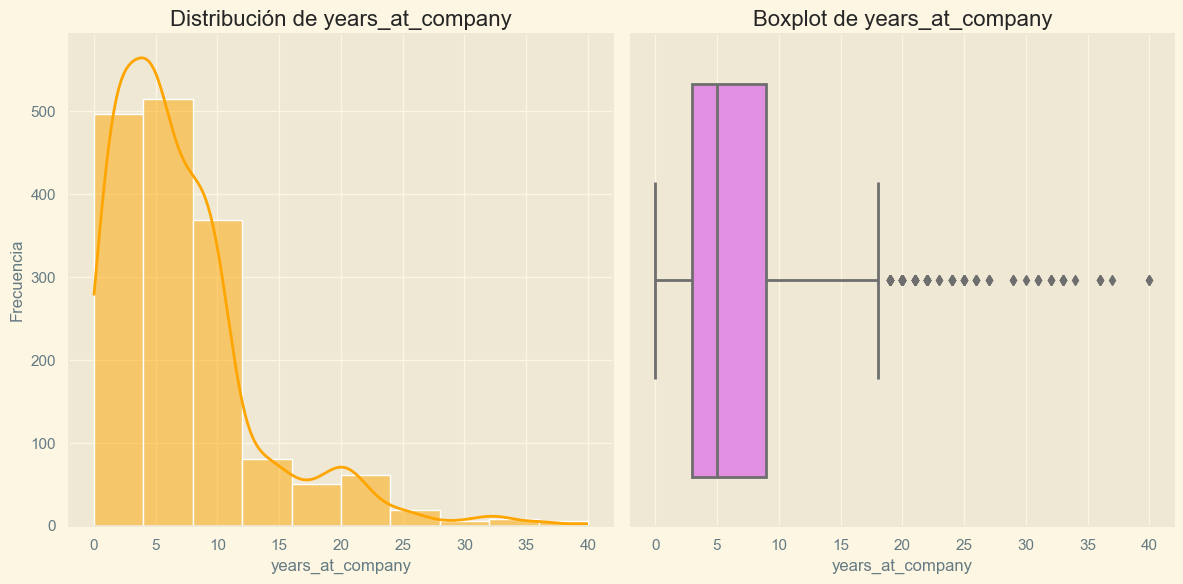

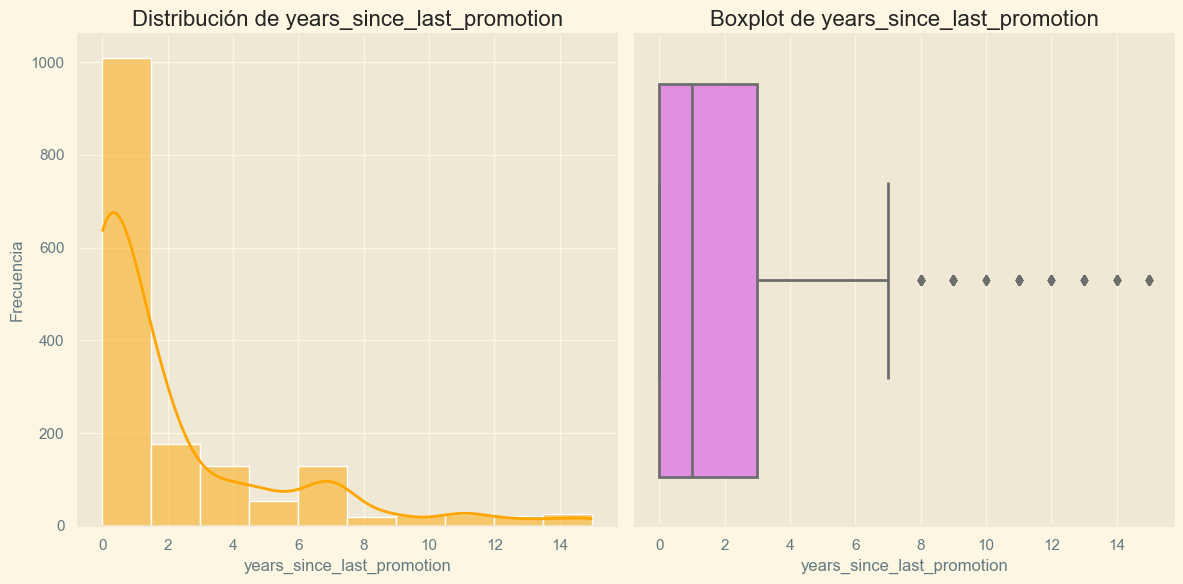

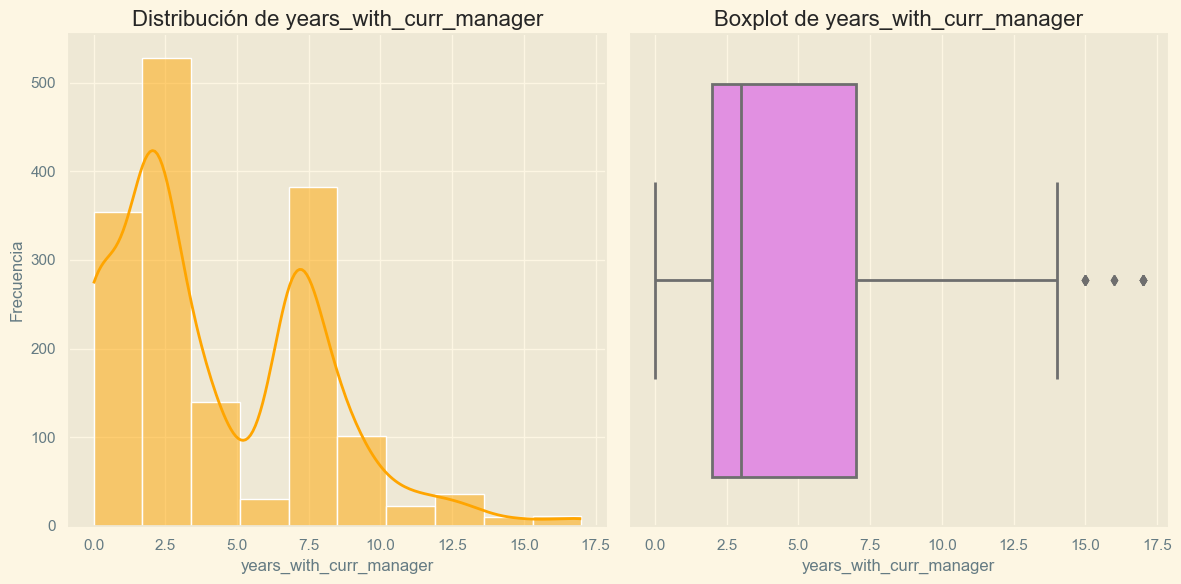

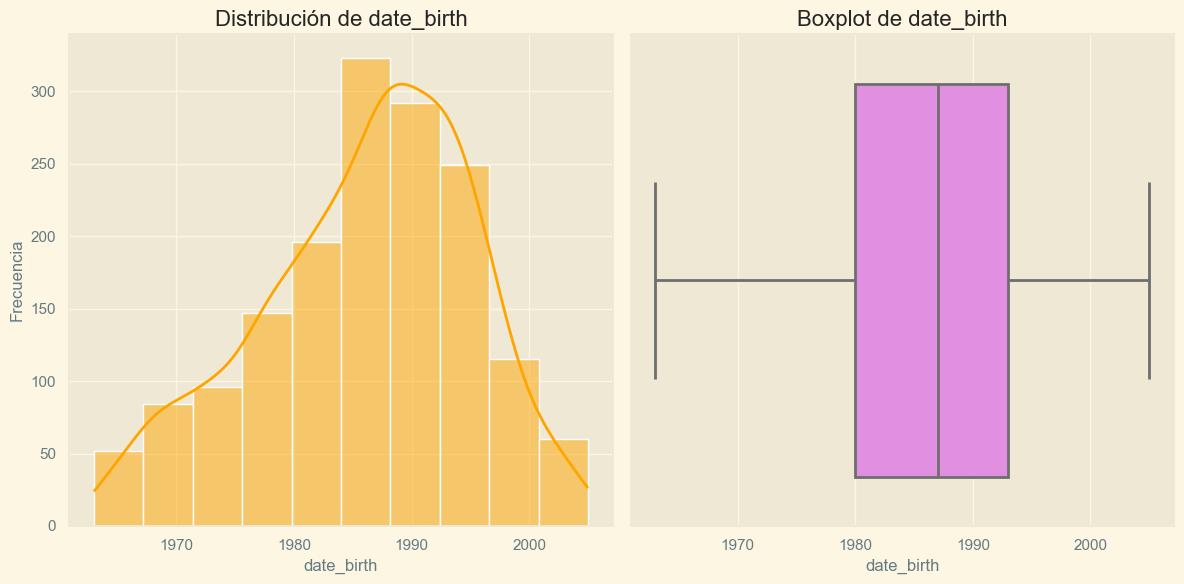

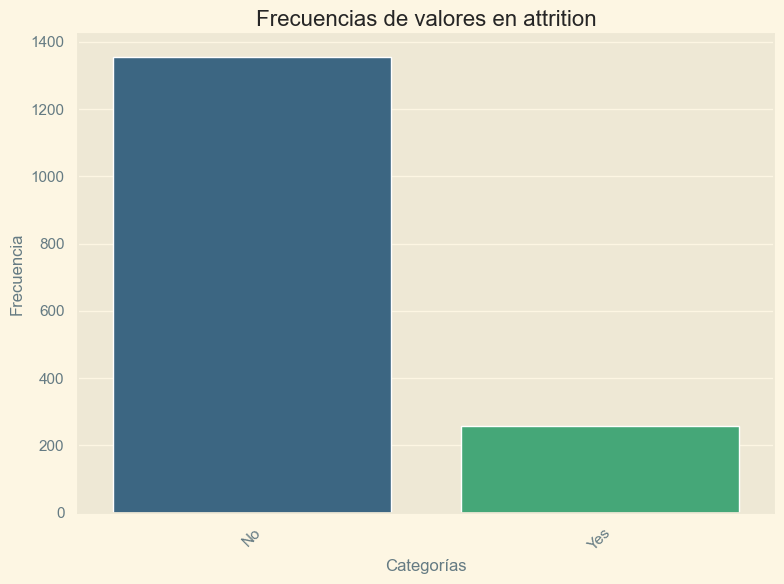

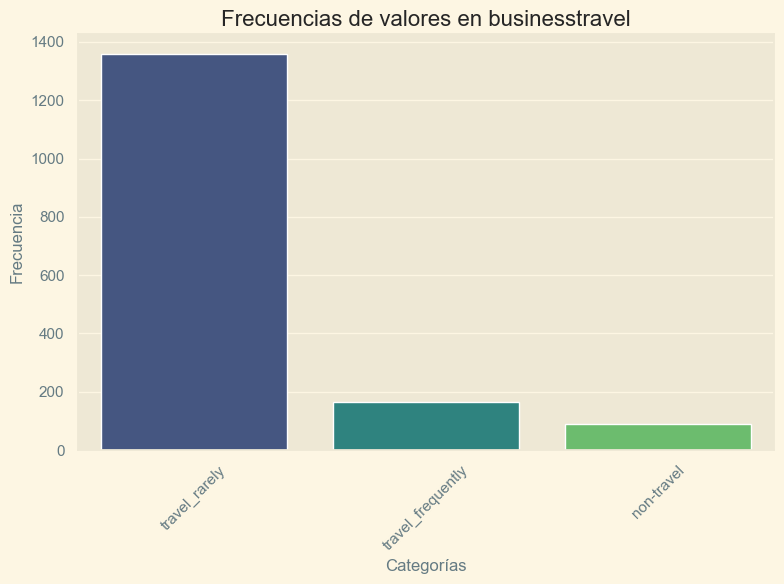

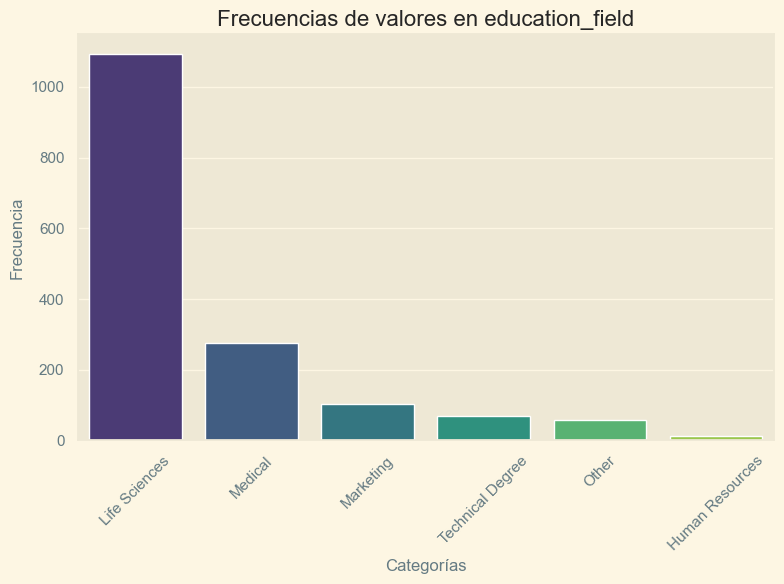

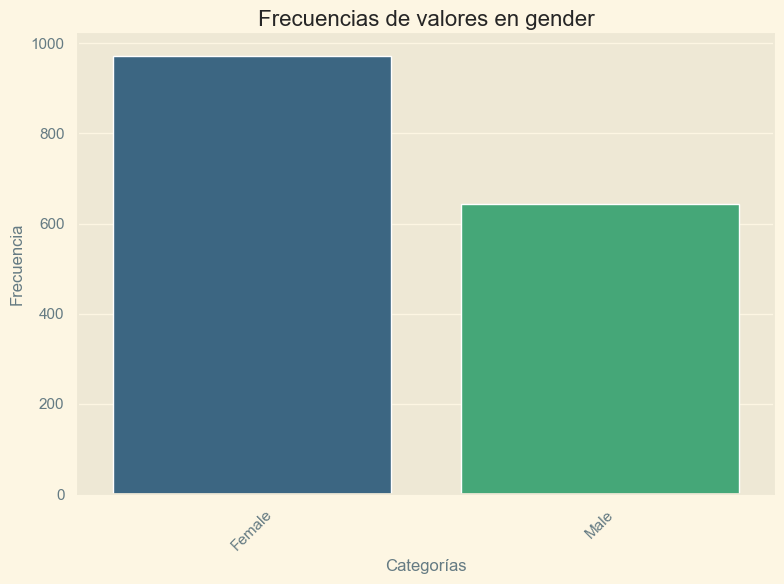

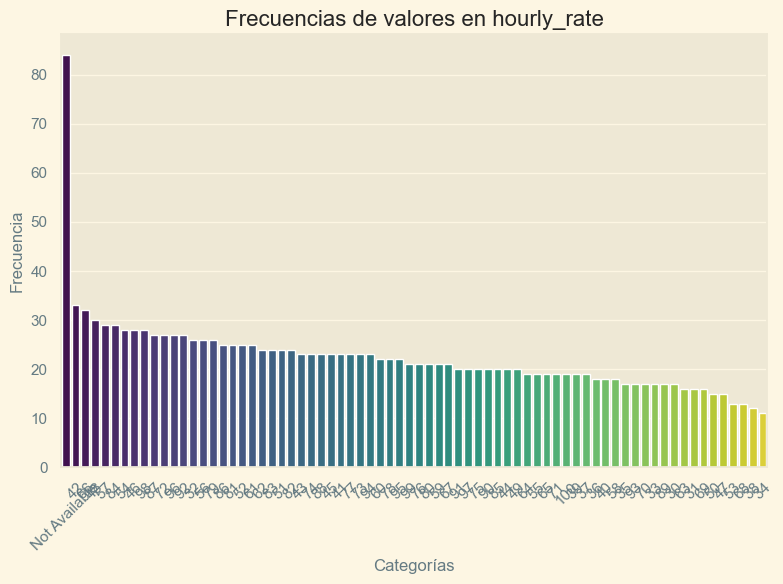

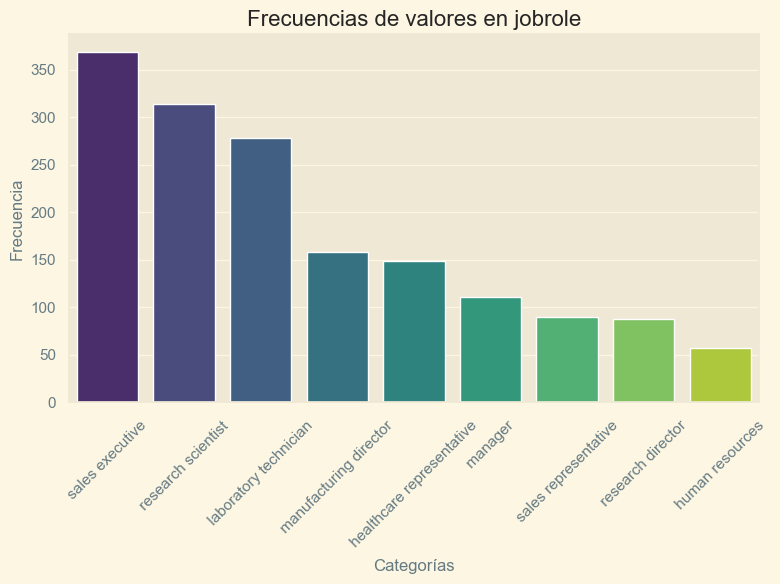

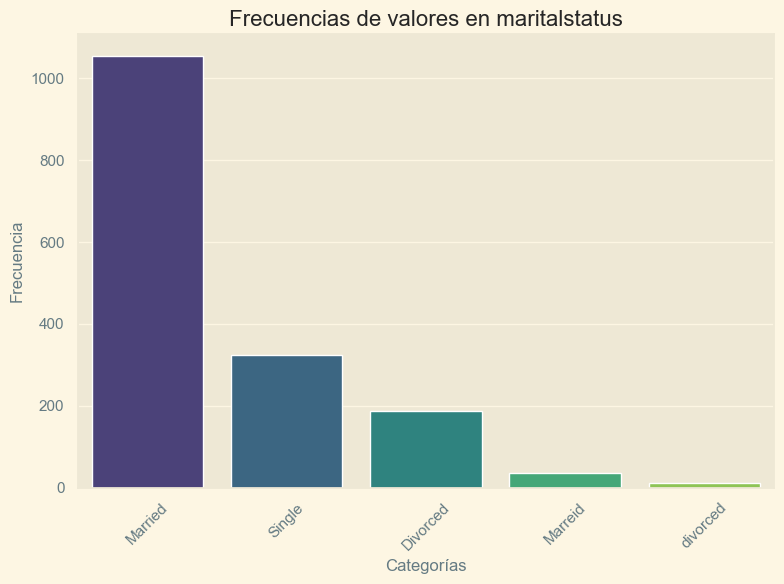

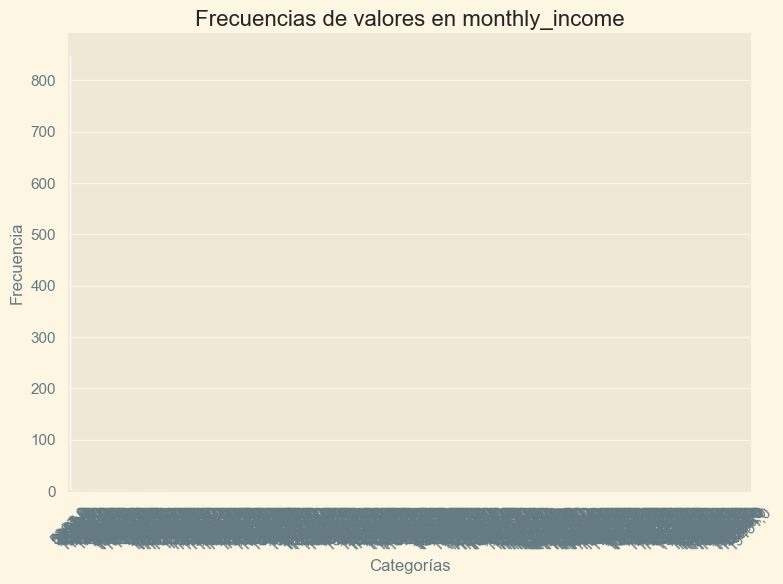

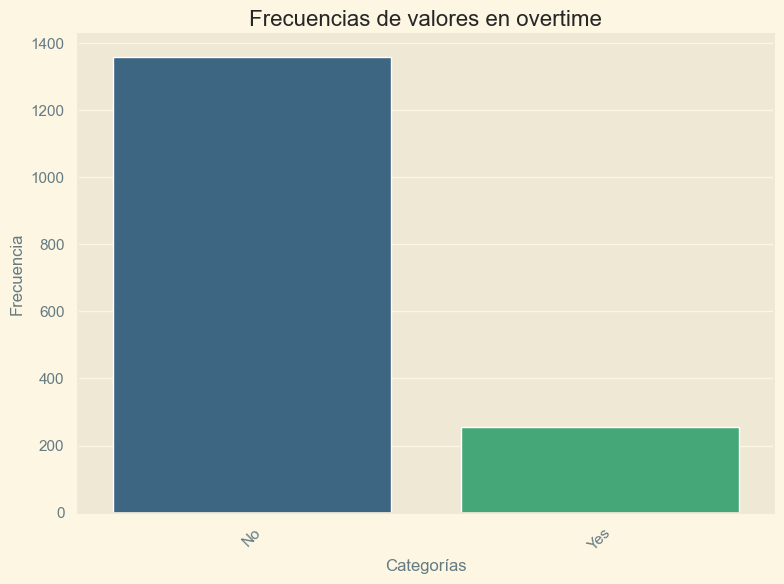

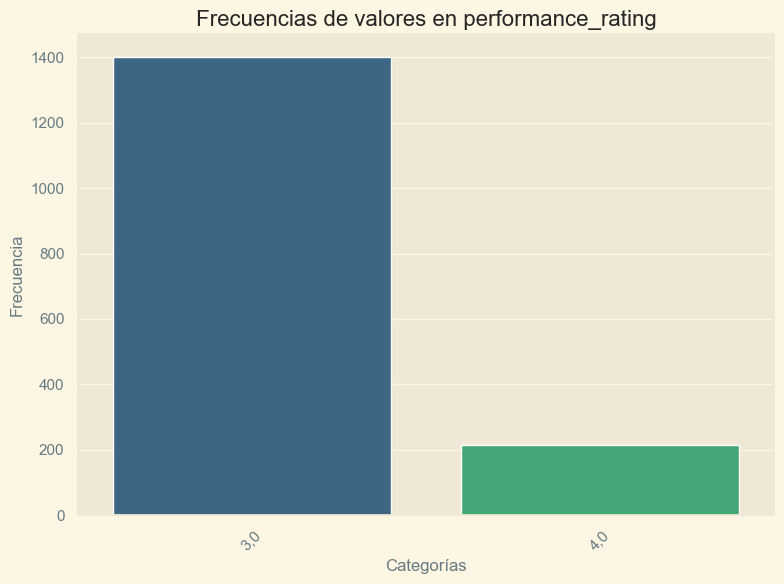

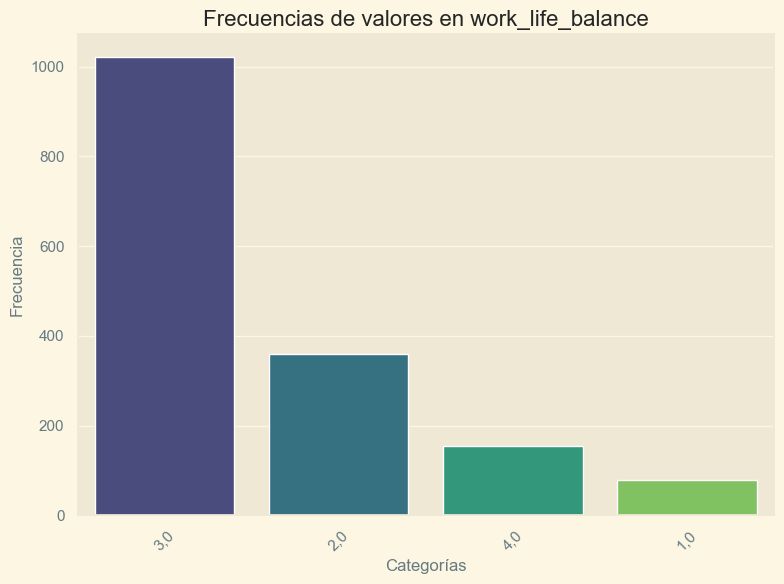

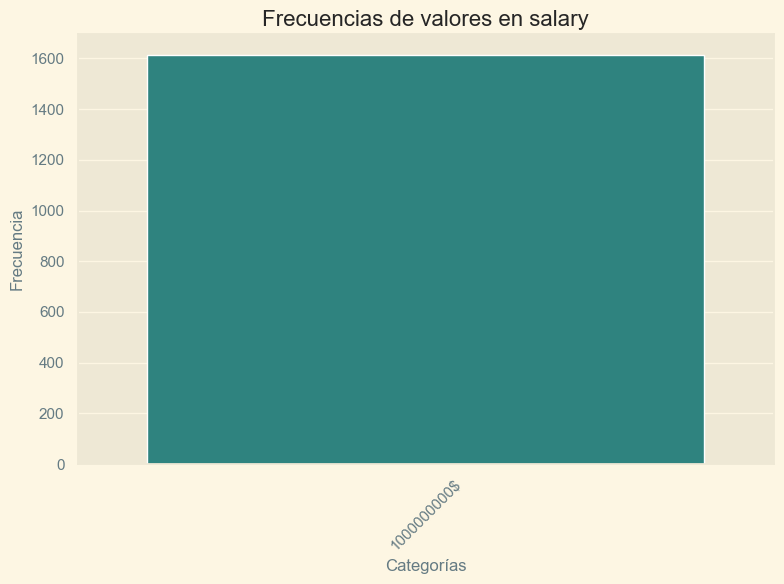

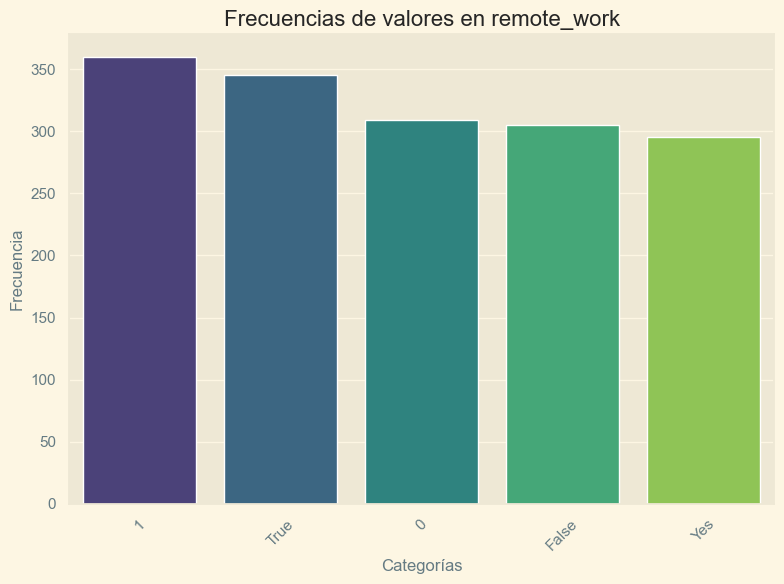

In [30]:
def visualizar_estadisticas(estadisticas):
    # Visualización de estadísticas numéricas
    for col, stats in estadisticas["numericas"].items():
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        # Histograma
        sns.histplot(df[col].dropna(), kde=True, ax=axes[0], color='orange', bins=10)
        axes[0].set_title(f"Distribución de {col}")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Frecuencia")
        
        # Boxplot
        sns.boxplot(x=df[col].dropna(), ax=axes[1], color='violet')
        axes[1].set_title(f"Boxplot de {col}")
        axes[1].set_xlabel(col)
        plt.tight_layout()
        plt.show()
    
    # Visualización de estadísticas categóricas
    for col, stats in estadisticas["categoricas"].items():
        # Frecuencias directamente en el diccionario
        frecuencias = {key: val for key, val in stats.items() if key != "missing_values"}
        
        plt.figure(figsize=(8, 6))
        sns.barplot(x=list(frecuencias.keys()), y=list(frecuencias.values()), palette="viridis")
        plt.title(f"Frecuencias de valores en {col}")
        plt.xlabel("Categorías")
        plt.ylabel("Frecuencia")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    # llamamos a la funcion para visualizar los gráficos.
visualizar_estadisticas(estadisticas)


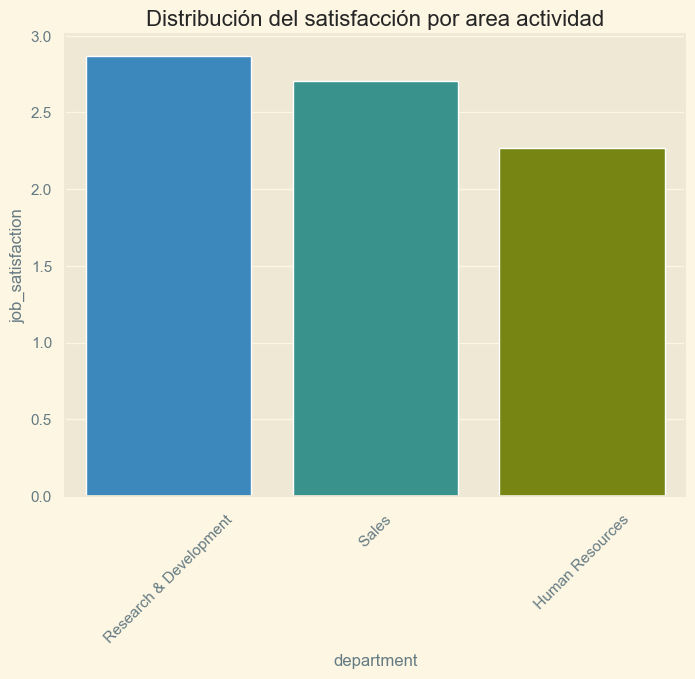

In [51]:
# Boxplot: Visualizando la distribución
# Distribución de la satisfacción laboral por departamento
plt.figure(figsize=(8, 6))
sns.barplot(x='department', y='job_satisfaction', data=df_raw,ci= None, estimator='mean')
plt.title('Distribución del satisfacción por area actividad')
plt.xticks(rotation=45) 
plt.show()

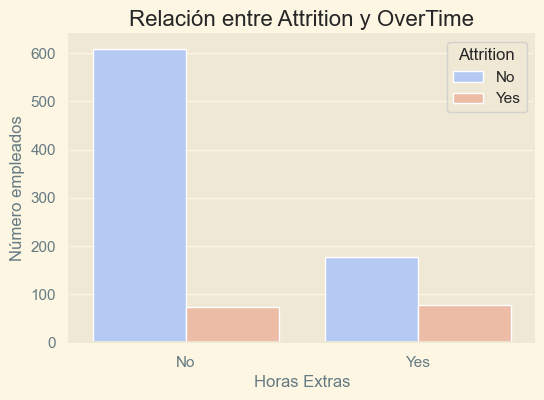

In [52]:
# Visualización con gráfico de barras de la relación entre Atttition y overtime
# ¿Existe relación entre la cantidad de horas extras y la tasa de abandono?
plt.figure(figsize=(6,4))
sns.countplot(data=df_renombradas, x='overtime', hue='attrition', palette='coolwarm')
plt.title('Relación entre Attrition y OverTime')
plt.xlabel('Horas Extras')
plt.ylabel('Número empleados')
plt.legend(title='Attrition')
plt.show()

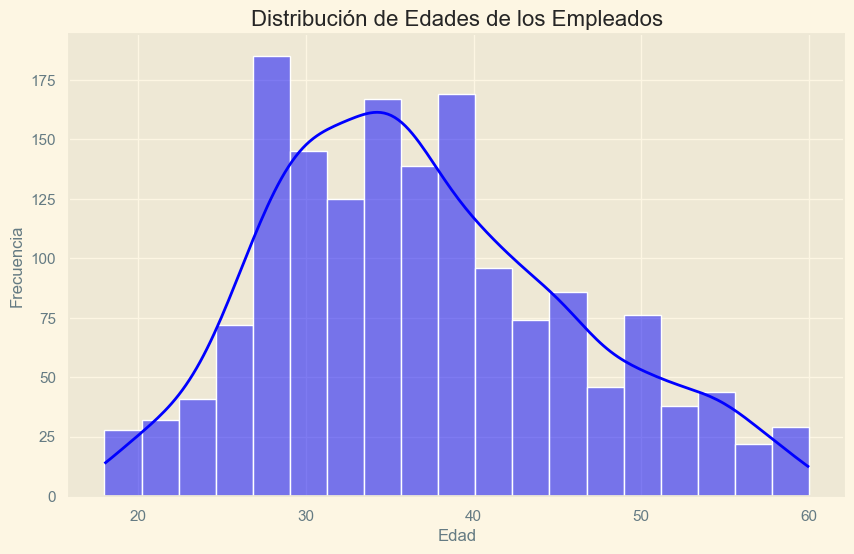

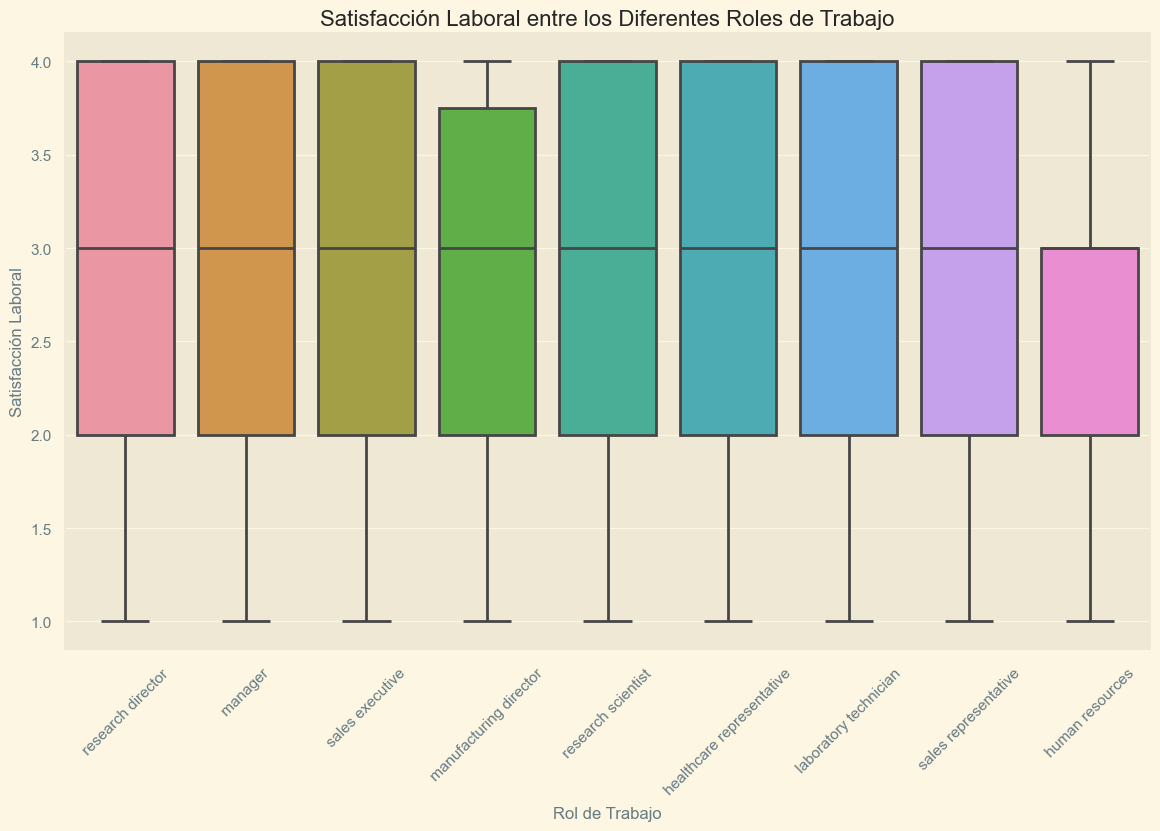

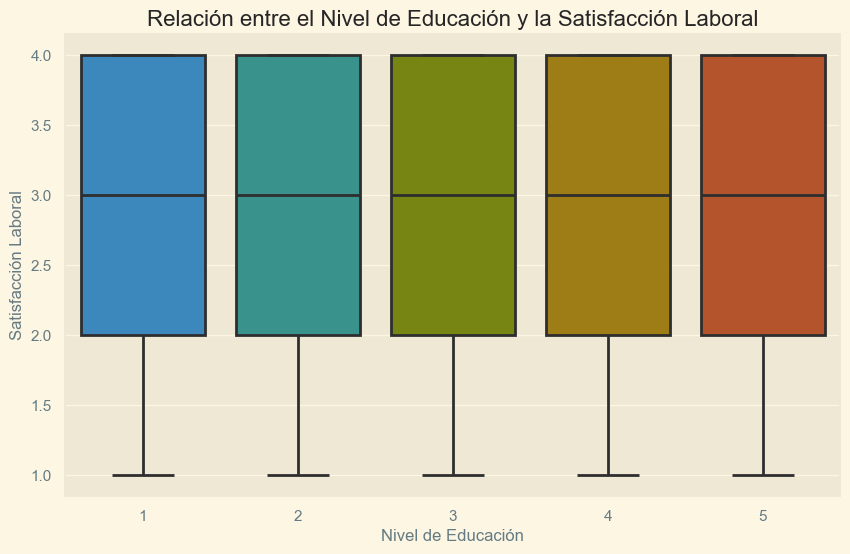

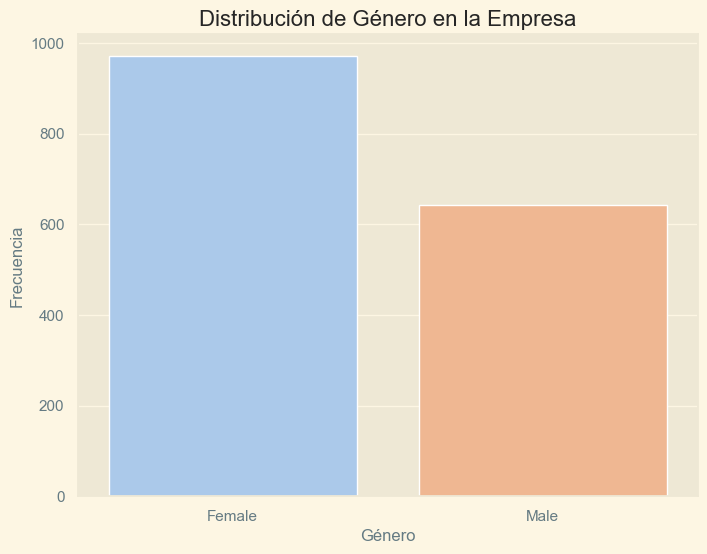

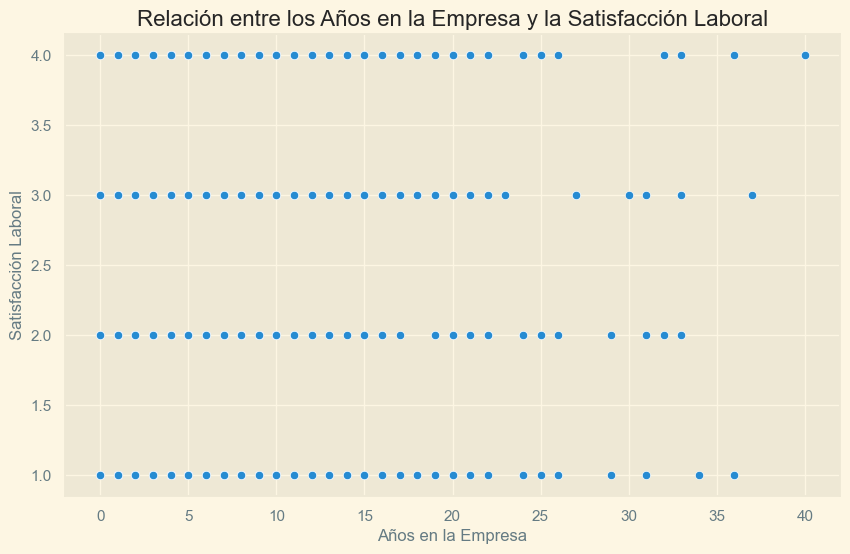

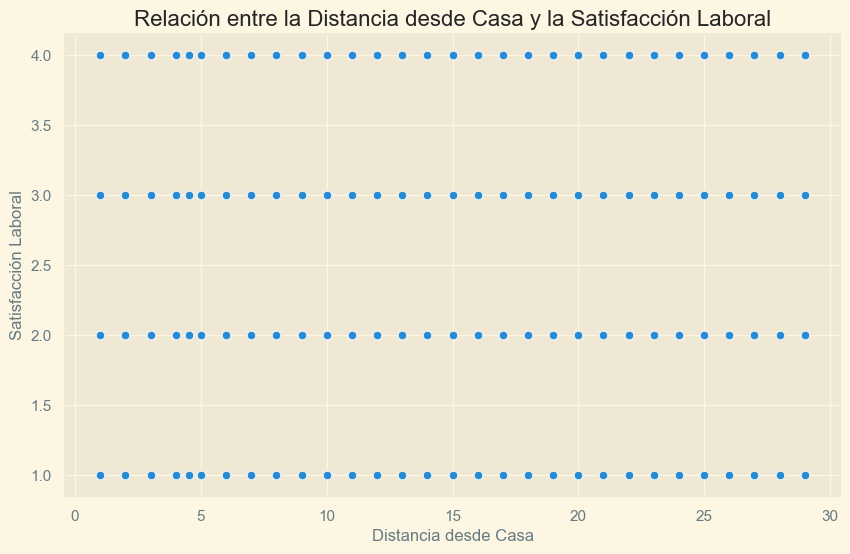

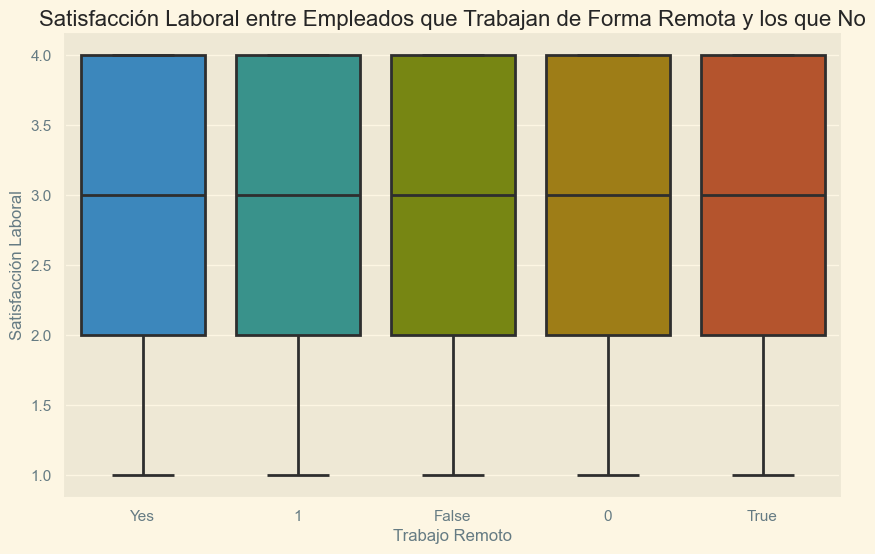

In [53]:
# 1. ¿Cuál es la distribución de edades de los empleados?
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Distribución de Edades de los Empleados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()
# 2. ¿Cómo se distribuye la satisfacción laboral entre los diferentes roles de trabajo?
plt.figure(figsize=(14, 8))
sns.boxplot(x='jobrole', y='job_satisfaction', data=df)
plt.title('Satisfacción Laboral entre los Diferentes Roles de Trabajo')
plt.xlabel('Rol de Trabajo')
plt.ylabel('Satisfacción Laboral')
plt.xticks(rotation=45)
plt.show()
# 3. ¿Existe una relación entre el nivel de educación y la satisfacción laboral?
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='job_satisfaction', data=df)
plt.title('Relación entre el Nivel de Educación y la Satisfacción Laboral')
plt.xlabel('Nivel de Educación')
plt.ylabel('Satisfacción Laboral')
plt.show()
# 4. ¿Cuál es la distribución de género en la empresa?
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Distribución de Género en la Empresa')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()
# 5. ¿Cuál es la relación entre los años en la empresa y la satisfacción laboral?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='years_at_company', y='job_satisfaction', data=df)
plt.title('Relación entre los Años en la Empresa y la Satisfacción Laboral')
plt.xlabel('Años en la Empresa')
plt.ylabel('Satisfacción Laboral')
plt.show()
# 6. ¿Cuál es la relación entre la distancia desde casa y la satisfacción laboral?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_from_home', y='job_satisfaction', data=df)
plt.title('Relación entre la Distancia desde Casa y la Satisfacción Laboral')
plt.xlabel('Distancia desde Casa')
plt.ylabel('Satisfacción Laboral')
plt.show()
# 7. ¿Cómo varía la satisfacción laboral entre los empleados que trabajan de forma remota y los que no?
plt.figure(figsize=(10, 6))
sns.boxplot(x='remote_work', y='job_satisfaction', data=df)
plt.title('Satisfacción Laboral entre Empleados que Trabajan de Forma Remota y los que No')
plt.xlabel('Trabajo Remoto')
plt.ylabel('Satisfacción Laboral')
plt.show()

## FASE 3: DISEÑO DE BBDD E INSERCIÓN DE DATOS

In [22]:
# Importamos las librerías necesarias para la creación de la base de datos
# ----------------------------------------------------------------------- 
import mysql.connector
from mysql.connector import Error
import pandas as pd

# Creamos la conexión a la base de datos
try:
    # Establece la conexión a la base de datos
    conx = mysql.connector.connect(
        user = "root",
        password = "AlumnaAdalab",
        host = "127.0.0.1",
        database = "tienda",
        auth_plugin='mysql_native_password'
    )

    if conx.is_connected():
        print("Conexión establecida con éxito.")

except mysql.connector.Error as err:
    print(err)
    print("Error Code:", err.errno)
    print("SQLSTATE", err.sqlstate)
    print("Message", err.msg)

# Cerramos la conexión
conx.close()

Conexión establecida con éxito.


In [23]:
# Re-establecer la conexión a la base de datos
conx = mysql.connector.connect(
	user = "root",
	password = "AlumnaAdalab",
	host = "127.0.0.1",
	database = "tienda"
)

# Crear el cursor
cursor = conx.cursor()

# Borramos la base de datos si existe
cursor.execute("DROP DATABASE IF EXISTS `Proyecto: Optimización de Talento`;")

# Query para crear la base de datos
query = "CREATE DATABASE `Proyecto: Optimización de Talento`;"

# Ejecutamos la query
cursor.execute(query)

print("Base de datos: 'Proyecto: Optimización de Talento' creada con éxito.")

# Cerramos la conexión
conx.close()

Base de datos: 'Proyecto: Optimización de Talento' creada con éxito.


In [24]:
# Re-establecer la conexión a la base de datos
conx = mysql.connector.connect(
    user = "root",
    password = "AlumnaAdalab",
    host = "127.0.0.1",
    database = "Proyecto: Optimización de Talento"
)

# Crear el cursor
cursor = conx.cursor()

# Crear la tabla empleados
# Esta tabla contendría información sobre los empleados.

cursor.execute (""" 
CREATE TABLE Employees (
    EmployeeID INT PRIMARY KEY,
    Age FLOAT,
    Attrition VARCHAR(10),
    BusinessTravel VARCHAR(50),
    DistanceFromHome FLOAT,
    Education INT,
    EducationField VARCHAR(50),
    Gender VARCHAR(10),
    MaritalStatus VARCHAR(20),
    DateBirth INT,
    RemoteWork VARCHAR(10)
);
""")
print("Tabla Employees creada con éxito.")

# Crear la tabla detalles_empleados
# Esta tabla contendría información sobre los detalles de los empleados.

cursor.execute (""" 
CREATE TABLE JobDetails (
    EmployeeID INT PRIMARY KEY,
    JobRole VARCHAR(50),
    JobLevel INT,
    Department VARCHAR(50),
    JobInvolvement INT,
    JobSatisfaction INT,
    YearsAtCompany INT,
    YearsInCurrentRole INT,
    YearsSinceLastPromotion INT,
    YearsWithCurrManager INT
);
""")
print("Tabla JobDetails creada con éxito.")

# Crear la tabla salario
# Esta tabla contendría información sobre los salarios de los empleados.

cursor.execute ("""
CREATE TABLE Salaries (
    EmployeeID INT PRIMARY KEY,
    MonthlyIncome FLOAT,
    MonthlyRate INT,
    DailyRate FLOAT,
    PercentSalaryHike INT,
    StockOptionLevel INT,
    Salary VARCHAR(50)
);
""")
print("Tabla Salaries creada con éxito.")

# Crear la tabla performance
# Esta tabla contendría información sobre el rendimiento y la satisfacción de los empleados.

cursor.execute ("""
CREATE TABLE Performance (
    EmployeeID INT PRIMARY KEY,
    EnvironmentSatisfaction INT,
    RelationshipSatisfaction INT,
    PerformanceRating FLOAT,
    TrainingTimesLastYear INT,
    WorkLifeBalance FLOAT
);
""")
print("Tabla Performance creada con éxito.")

# Crear tabla historial_cambios
# Esta tabla contendría información sobre los cambios en los empleados.

cursor.execute("""
CREATE TABLE ChangeHistory (
    ChangeID INT AUTO_INCREMENT PRIMARY KEY,
    EmployeeID INT,
    ChangeDate DATE,
    ChangeType VARCHAR(50),
    Details TEXT,
    FOREIGN KEY (EmployeeID) REFERENCES Employees(EmployeeID)
);
""")
print("Tabla ChangeHistory creada con éxito.")

# Crear la tabla Demographics
# Esta tabla contendría información demográfica de los empleados.

cursor.execute ("""
CREATE TABLE Demographics (
    EmployeeID INT PRIMARY KEY,
    NumCompaniesWorked INT,
    TotalWorkingYears FLOAT,
    OverTime VARCHAR(10),
    HourlyRate FLOAT
);
""")
print("Tabla Demographics creada con éxito.")

# Crear la tabla de proyectos
# Esta tabla contendría información sobre los proyectos de los empleados.

cursor.execute ("""
CREATE TABLE Projects (
    ProjectID INT AUTO_INCREMENT PRIMARY KEY,
    ProjectName VARCHAR(100) NOT NULL,
    StartDate DATE,
    EndDate DATE
);
""")
print("Tabla Projects creada con éxito.")

# Crear la tabla de asignaciones
# Esta tabla contendría información sobre las asignaciones de los empleados a los proyectos.

cursor.execute ("""
CREATE TABLE Assignments (
    AssignmentID INT AUTO_INCREMENT PRIMARY KEY,
    EmployeeID INT,
    ProjectID INT,
    StartDate DATE,
    EndDate DATE,
    FOREIGN KEY (EmployeeID) REFERENCES Employees(EmployeeID),
    FOREIGN KEY (ProjectID) REFERENCES Projects(ProjectID)
);
""")
print("Tabla Assignments creada con éxito.")

# Crear la tabla de evaluaciones
# Esta tabla contendría información sobre las evaluaciones de los empleados.

cursor.execute ("""
CREATE TABLE Evaluations (
    EvaluationID INT AUTO_INCREMENT PRIMARY KEY,
    EmployeeID INT,
    EvaluationDate DATE,
    EvaluationType VARCHAR(50),
    EvaluationResult TEXT,
    FOREIGN KEY (EmployeeID) REFERENCES Employees(EmployeeID)
);
""")
print("Tabla Evaluations creada con éxito.")

# Crear la tabla de beneficios
# Esta tabla contendría información sobre los beneficios de los empleados.

cursor.execute ("""
CREATE TABLE Benefits (
    BenefitID INT AUTO_INCREMENT PRIMARY KEY,
    EmployeeID INT,
    BenefitType VARCHAR(50),
    BenefitAmount FLOAT,
    BenefitStartDate DATE,
    BenefitEndDate DATE,
    FOREIGN KEY (EmployeeID) REFERENCES Employees(EmployeeID)
);
""")
print("Tabla Benefits creada con éxito.")

# Crear la tabla DatosFaltantes
# Esta tabla contendría información sobre los datos faltantes en el dataset.

cursor.execute ("""
CREATE TABLE MissingData (
    EmployeeID INT PRIMARY KEY,
    MissingValues INT
);
""")
print("Tabla MissingData creada con éxito.")

# Cerramos la conexión
conx.close()


Tabla Employees creada con éxito.
Tabla JobDetails creada con éxito.
Tabla Salaries creada con éxito.
Tabla Performance creada con éxito.
Tabla ChangeHistory creada con éxito.
Tabla Demographics creada con éxito.
Tabla Projects creada con éxito.
Tabla Assignments creada con éxito.
Tabla Evaluations creada con éxito.
Tabla Benefits creada con éxito.
Tabla MissingData creada con éxito.


In [25]:
# Re-establecer la conexión a la base de datos
conx = mysql.connector.connect(
    user="root",
    password="AlumnaAdalab",
    host="127.0.0.1",
    database="Proyecto: Optimización de Talento"
)

# Crear el cursor
cursor = conx.cursor()

# Insertar datos en la tabla Employees
cursor.execute("""
INSERT INTO Employees (EmployeeID, Age, Attrition, BusinessTravel, DistanceFromHome, Education, EducationField, Gender, MaritalStatus, DateBirth, RemoteWork)
VALUES
(1, 41, 'Yes', 'Travel_Rarely', 1, 2, 'Life Sciences', 'Female', 'Married', 1972, 'Yes')
""")
# Insertar datos en la tabla JobDetails
cursor.execute("""
INSERT INTO JobDetails (EmployeeID, JobRole, JobLevel, Department, JobInvolvement, JobSatisfaction, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager)
VALUES
(1, 'Research Director', 5, 'Research & Development', 3, 4, 20, 15, 5, 7)
""")

# Insertar datos en la tabla Salaries
cursor.execute("""
INSERT INTO Salaries (EmployeeID, MonthlyIncome, MonthlyRate, DailyRate, PercentSalaryHike, StockOptionLevel, Salary)
VALUES
(1, 19537.0, 6462, 684.0, 13, 0, '1000000000$')
""")

# Insertar datos en la tabla Performance
cursor.execute("""
INSERT INTO Performance (EmployeeID, EnvironmentSatisfaction, RelationshipSatisfaction, PerformanceRating, TrainingTimesLastYear, WorkLifeBalance)
VALUES
(1, 1, 3, 3.0, 5, 3.0)
""")

# Insertar datos en la tabla ChangeHistory
cursor.execute("""
INSERT INTO ChangeHistory (EmployeeID, ChangeDate, ChangeType, Details)
VALUES
(1, '2023-01-01', 'Promotion', 'Promoted to Research Director')
""")

# Insertar datos en la tabla Demographics
cursor.execute("""
INSERT INTO Demographics (EmployeeID, NumCompaniesWorked, TotalWorkingYears, OverTime, HourlyRate)
VALUES
(1, 7, 11.318934, 'No', 51.0)
""")

# Insertar datos en la tabla Projects
cursor.execute("""
INSERT INTO Projects (ProjectID, ProjectName, StartDate, EndDate)
VALUES
(1, 'Project Alpha', '2022-01-01', '2022-12-31')
""")

# Insertar datos en la tabla Assignments
cursor.execute("""
INSERT INTO Assignments (EmployeeID, ProjectID, StartDate, EndDate)
VALUES
(1, 1, '2022-01-01', '2022-12-31')
""")

# Insertar datos en la tabla Evaluations
cursor.execute("""
INSERT INTO Evaluations (EmployeeID, EvaluationDate, EvaluationType, EvaluationResult)
VALUES
(1, '2022-12-31', 'Annual Review', 'Exceeded Expectations')
""")

# Insertar datos en la tabla Benefits
cursor.execute("""
INSERT INTO Benefits (EmployeeID, BenefitType, BenefitAmount, BenefitStartDate, BenefitEndDate)
VALUES
(1, 'Health Insurance', 5000.0, '2022-01-01', '2022-12-31')
""")

# Insertar datos en la tabla MissingData
cursor.execute("""
INSERT INTO MissingData (EmployeeID, MissingValues)
VALUES
(1, 0)
""")
# Confirmar la transacción
conx.commit()

# Cerrar el cursor y la conexión
cursor.close()
conx.close()


## FASE 4: PROBLEMA DE A/B TESTING


La tasa de rotación para cada grupo es:
  Grupo  Tasa Rotación
0     A          0.137
1     B          0.199

El número de 'Yes' es 0.137 mientras que el de 'No' es 0.199
------------------------------------------------------

El tamaño de la muestra para 'Yes' es 995 mientras que para 'No' es 619
------------------------------------------------------

El nivel de significancia es: 0.05
------------------------------------------------------
Estadístico z: -3.3010347972726013
Valor p: 0.0009632893461685965
Rechazamos la hipótesis nula


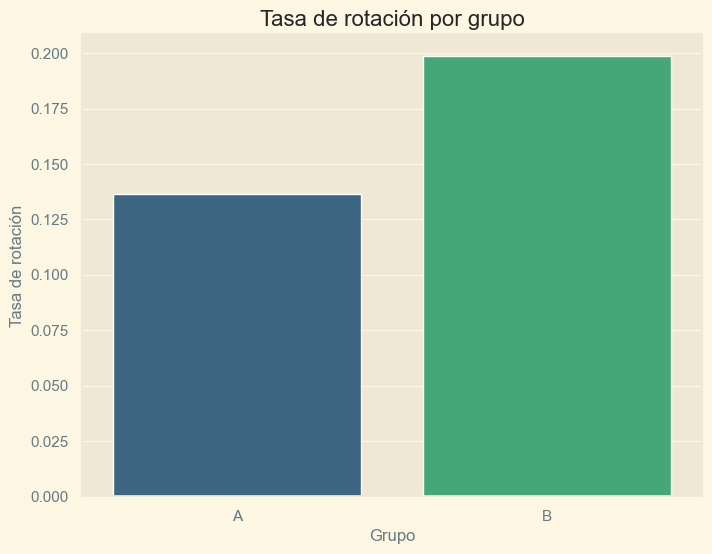

In [26]:
# Problema de A/B Testing
# -----------------------------------------------------------------------

# Plantear Hipótesis
H0 = "Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa"
H1 = "No Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa"

# Creamos una columna 'Grupo' basada en el nivel de satisfacción
df['Grupo'] = df['job_satisfaction'].apply(lambda x: 'A' if x >= 3 else 'B')

# Calcula la tasa de rotación para cada grupo (porcentaje de empleados que han abandonado la empresa).
tasa_rotacion = (df.groupby('Grupo')['attrition'].apply(lambda x: (x == 'Yes').sum() / x.count()).reset_index(name='Tasa Rotación'))
print(f"\nLa tasa de rotación para cada grupo es:")
print(tasa_rotacion.round(3))

# Planteamos Hipótesis
    # HO: tasa_rotacion_A = tasa_rotacion_B
    # H1: tasa_rotacion_A != tasa_rotacion_B

# Calculamos el número de 'Yes' y 'No'
contar_A = df[df['Grupo'] == 'A']['attrition'].value_counts(normalize=True).get('Yes', 0)
contar_B = df[df['Grupo'] == 'B']['attrition'].value_counts(normalize=True).get('Yes', 0)
print(f"\nEl número de 'Yes' es {contar_A.round(3)} mientras que el de 'No' es {contar_B.round(3)}")
print("------------------------------------------------------")

# Calculamos el tamaño de la muestra n
n_A = len(df[df['Grupo'] == 'A'])
n_B = len(df[df['Grupo'] == 'B'])
print(f"\nEl tamaño de la muestra para 'Yes' es {n_A} mientras que para 'No' es {n_B}")
print("------------------------------------------------------")

# Elección de nivel de significancia: 0.05
alpha = 0.05
print(f"\nEl nivel de significancia es: {alpha}")
print("------------------------------------------------------")

# Contamos el número de 'Yes' en cada grupo
count_A = df[df['Grupo'] == 'A']['attrition'].value_counts().get('Yes', 0)
count_B = df[df['Grupo'] == 'B']['attrition'].value_counts().get('Yes', 0)

# Tamaños de muestra
n_A = len(df[df['Grupo'] == 'A'])
n_B = len(df[df['Grupo'] == 'B'])


# Realizamos la prueba z de dos proporciones
z_stat, p_val = proportions_ztest([count_A, count_B], [n_A, n_B])
print(f'Estadístico z: {z_stat}')
print(f'Valor p: {p_val}')

# Comparamos el valor p con el nivel de significancia
if p_val < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

# Visualizamos los resultados

## Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Grupo', y='Tasa Rotación', data=tasa_rotacion, palette="viridis")
plt.title("Tasa de rotación por grupo")
plt.xlabel("Grupo")
plt.ylabel("Tasa de rotación")
plt.show()

# Guardamos el DataFrame en un archivo CSV
df.to_csv("./CSV Ejercicio/4_df_problema_ab_testing.csv", index=False)

In [27]:
## Conclusión de los resultados obtenidos

# -----------------------------------------------------------------------

# En este proyecto hemos realizado un análisis exploratorio de los datos de recursos humanos de una empresa.
# Hemos limpiado y transformado los datos, identificado y tratado los valores nulos,
# y realizado un análisis estadístico para evaluar la relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa.

# Los resultados indican que la tasa de rotación en el Grupo B (empleados con satisfacción menor a 3) es 0.199 (19.9%),
# mientras que en el Grupo A (satisfacción igual o mayor a 3) es 0.137 (13.7%).
# Esta diferencia sugiere que los empleados menos satisfechos tienen una mayor probabilidad de abandonar la empresa.

## Análisis estadístico y significancia

# Se realizó una prueba de hipótesis con un nivel de significancia de 0.05.
# El estadístico z es -3.301, y el valor p es 0.00096, lo cual es menor que 0.05.
# Esto significa que la diferencia en la tasa de rotación entre los grupos A y B es estadísticamente significativa.
# Como resultado, rechazamos la hipótesis nula, lo que confirma que no existe una relación significativa entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa.

## Magnitud del impacto

# La diferencia en tasas de rotación entre los dos grupos es 0.199 - 0.137 = 0.062 (6.2 puntos porcentuales).
# Esto indica que los empleados con menor satisfacción tienen una probabilidad de rotación aproximadamente 6.2% mayor que los empleados con mayor satisfacción.
# Sin embargo, dado que la hipótesis nula ha sido rechazada, esta diferencia no puede ser atribuida directamente a la satisfacción laboral de manera concluyente.

## Implicaciones prácticas

# Retención de talento: A pesar de los resultados estadísticos, la empresa podría explorar estrategias para mejorar la satisfacción laboral y observar su impacto en la rotación.
# Investigación adicional: Se recomienda analizar otros factores que podrían estar influyendo en la rotación de empleados, como el salario, ambiente de trabajo, oportunidades de crecimiento, entre otros.
# Estrategias de mejora: Implementar acciones como encuestas de satisfacción, programas de bienestar laboral, oportunidades de desarrollo profesional y mejoras en el ambiente de trabajo.

## Conclusión Final

# Según los resultados obtenidos, no se puede afirmar que la satisfacción en el trabajo tenga una relación significativa con la rotación de empleados.
# Aunque los datos muestran diferencias en la tasa de rotación entre los grupos, estas diferencias no son atribuibles de manera concluyente al nivel de satisfacción laboral.
# Para obtener más información, se recomienda realizar estudios adicionales considerando otros factores que puedan influir en la rotación.


## FASE 5: CREACIÓN DE UNA ETL

In [28]:
# Extracción de datos de la base de datos
# -----------------------------------------------------------------------

# DEFINICIÓN DE FUNCIONES PARA EXTRAER DATOS DE LA BASE DE DATOS

# Función para extraer datos de una tabla
def extraer_datos(tabla):
    try:
        # Establece la conexión a la base de datos
        conx = mysql.connector.connect(
            user="root",
            password="AlumnaAdalab",
            host="127.0.0.1",
            database="Proyecto: Optimización de Talento"
        )
        # Crear el cursor
        cursor = conx.cursor()
        # Ejecutar la consulta para extraer datos
        query = f"SELECT * FROM {tabla}"
        cursor.execute(query)
        # Obtener los datos en un DataFrame de pandas
        df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
        return df
    except Error as e:
        print(f"Error al extraer datos: {e}")
    finally:
        if conx.is_connected():
            cursor.close()
            conx.close()

# Función para extraer datos de un archivo CSV
def extraer_datos_csv(ruta_archivo):
    try:
        df = pd.read_csv(ruta_archivo)
        return df
    except Exception as e:
        print(f"Error al extraer datos del archivo CSV: {e}")

# Función para extraer datos de una hoja de cálculo Excel
def extraer_datos_excel(ruta_archivo, hoja=None):
    try:
        df = pd.read_excel(ruta_archivo, sheet_name=hoja) if hoja else pd.read_excel(ruta_archivo) # Sheet name es opcional en caso de que el archivo tenga varias hojas de cálculo. (Para leer una específica)
        return df
    except Exception as e:
        print(f"Error al extraer datos del archivo Excel: {e}")


## FUNCIONES PARA LA TRANSFORMACIÓN Y LIMPIEZA DE DATOS

# Función para limpiar y transformar los valores en el DataFrame
def limpiar_transformar_datos(df):
# Reemplazar valores que contienen '$' y ',' en las columnas numéricas
    for col in df.select_dtypes(include='object').columns:
        if df[col].str.contains(r'\$|,').any():
            df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

    # Convertir todas las columnas de tipo object a minúsculas
    df = df.applymap(lambda s: s.lower() if type(s) == str else s)
    return df

# Función para transformar los datos
def transformar_datos(df):
    # Renombrar columnas
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    # Eliminar columnas redundantes
    redundant_columns = ['employee_count', 'standard_hours', 'employee_number']
    df = df.drop(columns=[col for col in redundant_columns if col in df.columns])
    # Eliminar columnas con valores constantes
    constant_columns = ['over18', 'same_as_monthly_income']
    df = df.drop(columns=[col for col in constant_columns if col in df.columns])
    # Reemplazar valores negativos en la columna DistanceFromHome por la media
    df['distance_from_home'] = df['distance_from_home'].apply(lambda x: df['distance_from_home'].mean() if x < 0 else x)
    # Reemplazar valores faltantes en la columna 'age' por la media
    df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Convertir a numérico
    df['age'] = df['age'].fillna(df['age'].mean())  # Rellenar con la media
    return df

# Función para detectar valores nulos
def detectar_nulos(df):
    # Calcular el porcentaje de valores nulos
    nulos = df.isnull().sum() / df.shape[0] * 100
    # Mostrar solo valores nulos
    nulos = nulos[nulos > 0]
    return nulos

# Función para tratar valores nulos
def tratamiento_nulos(df):
    # Imputar valores nulos en variables numéricas
    for col in numericas:
        df[col] = df[col].fillna(df[col].mean())
    # Imputar valores nulos en variables categóricas
    for col in categoricas:
        df[col] = df[col].fillna(df[col].mode()[0])
    return df

# Función para detectar y tratar valores duplicados
def detectar_y_tratar_duplicados(df):
    # Detectar valores duplicados
    duplicados = df.duplicated().sum()
    # Eliminar duplicados
    df = df.drop_duplicates()
    return duplicados, df

# Función para detectar variables categóricas y numéricas
def detectar_variables_categoricas_numericas(df):
    # Identificar variables categóricas
    categoricas = df.select_dtypes(include=['object']).columns
    # Identificar variables numéricas
    numericas = df.select_dtypes(include=['float64', 'int64']).columns
    return categoricas, numericas

# Función para calcular estadísticas descriptivas
def estadistica_descriptiva(df):
    # Calcular estadísticas descriptivas
    estadisticas = df.describe(include='all')
    
    # Calcular la media de las variables numéricas
    medias = df[numericas].mean()
    
    # Calcular la correlación entre las variables numéricas
    correlacion = df.corr()
    
    # Calcular la distribución de las variables categóricas
    distribucion_categoricas = {col: df[col].value_counts() for col in categoricas if col in df.columns}
    
    # Calcular la moda de las variables categóricas
    modas = df[categoricas].mode().iloc[0]
    
    return {
        'estadisticas_descriptivas': estadisticas,
        'medias': medias,
        'correlacion': correlacion,
        'distribucion_categoricas': distribucion_categoricas,
        'modas': modas
    }

# Función para visualizar las estadísticas
def visualizar_estadisticas(estadisticas):
    # Visualizar estadísticas descriptivas
    print("Estadísticas Descriptivas:")
    print(estadisticas['estadisticas_descriptivas'])
    
    # Visualizar medias de variables numéricas
    print("\nMedias de Variables Numéricas:")
    print(estadisticas['medias'])
    
    # Visualizar correlación entre variables numéricas
    print("\nCorrelación entre Variables Numéricas:")
    print(estadisticas['correlacion'])
    
    # Visualizar distribución de variables categóricas
    print("\nDistribución de Variables Categóricas:")
    for col, dist in estadisticas['distribucion_categoricas'].items():
        print(f"\n{col}:")
        print(dist)
    
    # Visualizar moda de variables categóricas
    print("\nModa de Variables Categóricas:")
    print(estadisticas['modas'])


## FUNCIONES PARA LA CREACIÓN DE BASE DE DATOS

# Función para crear la base de datos
def crear_base_datos(nombre_base_datos):
    try:
        # Establece la conexión a la base de datos
        conx = mysql.connector.connect(
            user="root",
            password="AlumnaAdalab",
            host="127.0.0.1"
        )
        # Crear el cursor
        cursor = conx.cursor()
        # Crear la base de datos
        query = f"CREATE DATABASE {nombre_base_datos}"
        cursor.execute(query)
        print(f"Base de datos '{nombre_base_datos}' creada exitosamente.")
    except Error as e:
        print(f"Error al crear la base de datos: {e}")
    finally:
        if conx.is_connected():
            cursor.close()
            conx.close()

# Función para crear tablas en la base de datos
def crear_tablas(nombre_base_datos):
    try:
        # Establece la conexión a la base de datos
        conx = mysql.connector.connect(
            user="root",
            password="AlumnaAdalab",
            host="127.0.0.1",
            database=nombre_base_datos
        )
        # Crear el cursor
        cursor = conx.cursor()
        # Crear la tabla de ejemplo
        query = """
        CREATE TABLE empleados (
            id INT AUTO_INCREMENT PRIMARY KEY,
            nombre VARCHAR(255),
            edad INT,
            departamento VARCHAR(255),
            salario DECIMAL(10, 2)
        )
        """
        cursor.execute(query)
        print(f"Tabla 'empleados' creada exitosamente en la base de datos '{nombre_base_datos}'.")
    except Error as e:
        print(f"Error al crear la tabla: {e}")
    finally:
        if conx.is_connected():
            cursor.close()
            conx.close()

# Función para insertar datos en la base de datos
def insertar_datos(tabla, df):
    try:
        # Establece la conexión a la base de datos
        conx = mysql.connector.connect(
            user="root",
            password="AlumnaAdalab",
            host="127.0.0.1",
            database="Proyecto: Optimización de Talento"
        )
        # Crear el cursor
        cursor = conx.cursor()
        # Insertar datos en la tabla
        for _, row in df.iterrows():
            query = f"INSERT INTO {tabla} (nombre, edad, departamento, salario) VALUES (%s, %s, %s, %s)"
            cursor.execute(query, (row['nombre'], row['edad'], row['departamento'], row['salario']))
        conx.commit()
        print(f"Datos insertados exitosamente en la tabla '{tabla}'.")
    except Error as e:
        print(f"Error al insertar datos: {e}")
    finally:
        if conx.is_connected():
            cursor.close()
            conx.close()
